# Predicting customer churn for SyriaTel

#### Project description: **SyriaTel Customer Churn**

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

#### A predictive finding might include:

How well your model is able to predict the target
What features are most important to your model
A predictive recommendation might include:

The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
Suggestions for how the business might modify certain input variables to achieve certain target results

#### Iterative Approach to Modeling
You should demonstrate an iterative approach to modeling. This means that you must build multiple models. Begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs in the notebook discussing your final model.

With the additional techniques you have learned in Phase 3, be sure to explore:

Model features and preprocessing approaches
Different kinds of models (logistic regression, decision trees, etc.)
Different model hyperparameters
At minimum you must build two models:

A simple, interpretable baseline model (logistic regression or single decision tree)
A version of the simple model with tuned hyperparameters

#### Classification Metrics
You must choose appropriate classification metrics and use them to evaluate your models. Choosing the right classification metrics is a key data science skill, and should be informed by data exploration and the business problem itself. You must then use this metric to evaluate your model performance using both training and testing data.

**Potential Business Questions:**

* What were the factors influencing customer churn?
* What is the best model for predicting customer churn?
* How can the insights from feature importance help improve customer churn?
* Which services have the highest impact on customer churn?
* What services do customers with longer tenure have?
* What types of customers buy into long term contracts?
* What percentage of customers leave after one month/6 months/1 year
* Which state has the highest churn rate?

Plan:
* identify the key features that determine if a customer is likely to churn
* determine the most suitable model to predict Customer Churn 
* create customer retention strategy to reduce churn

### Data understanding

In [997]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from scipy.stats import chi2_contingency

In [998]:
df = pd.read_csv('churn_data.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [999]:
df.shape

(3333, 21)

In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [1001]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [1002]:
df.duplicated().sum()

np.int64(0)

In [1003]:
df['phone number'].duplicated().value_counts()

phone number
False    3333
Name: count, dtype: int64

In [1004]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Data dictionary 

* state: State where the customer resides
* account length: Duration (in days) the account has been active
* area code: Customer's area code
* phone number: Customer's phone number
* international plan: Indicates if the customer subscribes to the international plan
* voice mail plan: Indicates if the customer subscribes to the voice mail plan
* number vmail messages: Number of voicemails sent by the customer
* total day minutes: Total minutes of calls made during the day
* total day calls: Total number of daytime calls made
* total day charge: Charges for daytime calls
* total eve minutes: Total minutes of calls made during the evening
* total eve calls: Total number of evening calls made
* total eve charge: Charges for evening calls
* total night minutes: Total minutes of calls made at night
* total night calls: Total number of nighttime calls made
* total night charge: Charges for nighttime calls
* total intl minutes: Total minutes of international calls made
* total intl calls: Total number of international calls made
* total intl charge: Charges for international calls
* customer service calls: Number of customer service calls made
* churn: Indicates if the customer has terminated their contract

We have a datagrame with 3333 rows, 21 columns, with no missing values and no dupilcates.

### Data cleaning

The data set is originally very clean, we just need to make a couple if adjustments:  
* We replace spaces with a underline in the column name for a convinient format and to avoid mistakes.  
* We drop phone number column, as it doesn't bring any value for future analysis, it's a unique value for each row and we already used it to check for duplicates.  
* We replace values in three columns to 1s and 0s for further steps.

In [1005]:
#renaming columns
df.columns = df.columns.str.replace(' ', '_')

In [1006]:
#replacing objects and bool to numbers

df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}).astype(int)

df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}).astype(int)

df['churn'] = df['churn'].astype(int)

### Identify Relevant Columns

Let's examine our columns a little further, to determine which ones contain relevant information to our dataset.

In [1007]:
df.keys()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### State

In [1008]:
df['state'].value_counts(normalize=True, ascending=False)

state
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: proportion, dtype: float64

Looks like our data is pretty evenly distributed across the states...the value_counts range betwen 1-3%, which is a slight difference, but probably not a great enough discrepancy to draw great conclusions. 

### Account Length

In [1009]:
df['account_length'].value_counts(normalize=True, ascending=False)

account_length
105    0.012901
87     0.012601
101    0.012001
93     0.012001
90     0.011701
         ...   
243    0.000300
200    0.000300
232    0.000300
5      0.000300
221    0.000300
Name: proportion, Length: 212, dtype: float64

### Area Code

In [1010]:
df['area_code'].value_counts(normalize=True, ascending=False)

area_code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

In [1011]:
df['state'].nunique()

51

This is very odd. Why is there information from only three area codes? Especially given that we have calls from customers across all 50 states? 

Let's look at what geographic locations correspond to these three area-codes.

**415**: San Francisco, CA

**510**: East Bay cities in Northern California

**408**: San Jose, CA

### California Customers

All of the customers in our dataset have **California area codes**. Why is this?

It will probably be more helpful (if at all) to determine *from where the customer is calling*, rather than the area-code in which they originally purchased their cell-phone plan.

Let's create a key with this information, in case we need to easily and quickly refer to it later on. 

In [1012]:
area_codes = {
    415: 'San Francisco, CA',
    510: 'East Bay cities, Northern CA',
    408: 'San Jose, CA'
}

In [1013]:
keys = {
    'area_codes' : area_codes
}

### Customer Service

In [1014]:
df['customer_service_calls'].value_counts(normalize=True, ascending=False)

customer_service_calls
1    0.354335
2    0.227723
0    0.209121
3    0.128713
4    0.049805
5    0.019802
6    0.006601
7    0.002700
9    0.000600
8    0.000600
Name: proportion, dtype: float64

Interesting!! Out of all the data in our dataset, only 21% of customers did **not** call customer service at least once.

We should examine how many of these are related to churn in our EDA.

### Total Call-Time, and Call-Charge.

It would be great if we could make a new column, documenting the total number of minutes spent calling and/or the total charges made to a particular phone number. However, there seems to be an overlap between the *international* data, and the data based on *time of day*. (AKA, we can assume that "total_day_calls" includes the international calls made during the day, which are also documented in "total_intl_calls").

Time of day probably doesn't matter as much as location with regards to quality of telecommunications. We can feel good about focusing on the total number of minutes called & charged, regardless of time of day.

In [1015]:
# Creating new columns total_minutes and total_charge
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] 
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

### International Calls

At first glance, it might not seem necessary to have both 'international_plan' as well as 'total_intl_minutes'. We can assume someone has an international_plan, if they're logging a lot of minutes in international calls...why would we need to know both?

However, there might be instances in which people purchase an international_plan, then have technical difficulties preventing them from spending as many 'intl_minutes' on international calls as they'd like to...leading to churn. We'll keep these columns, and keep this in mind as we explore our data and run some tests.

### Dropping Columns

Let's drop our 'phone_number' column. We'll want to drop a bunch more, in order to hone in on feature selection. But we'll wait until we run some tests to check for multicollinearity.

In [1016]:
#drop unnecessary column
df = df.drop('phone_number', axis=1)

Let's take a look at a final clean columns -  3333 rows and 20 columns. Edited column names and replaces values in three columns

In [1017]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,707.2,72.86
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,611.5,55.54
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,527.2,59.00
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,558.2,65.02
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,501.9,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,0,650.8,57.43
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,0,575.8,60.94
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,0,661.5,63.93
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,0,512.6,56.18


### EDA

Let's plot and take a look at distribution of all numerical columns. 

In [1018]:
numeric = df.select_dtypes(include=['float64','int64'])

num_plots = len(numeric.columns)
num_plots

21

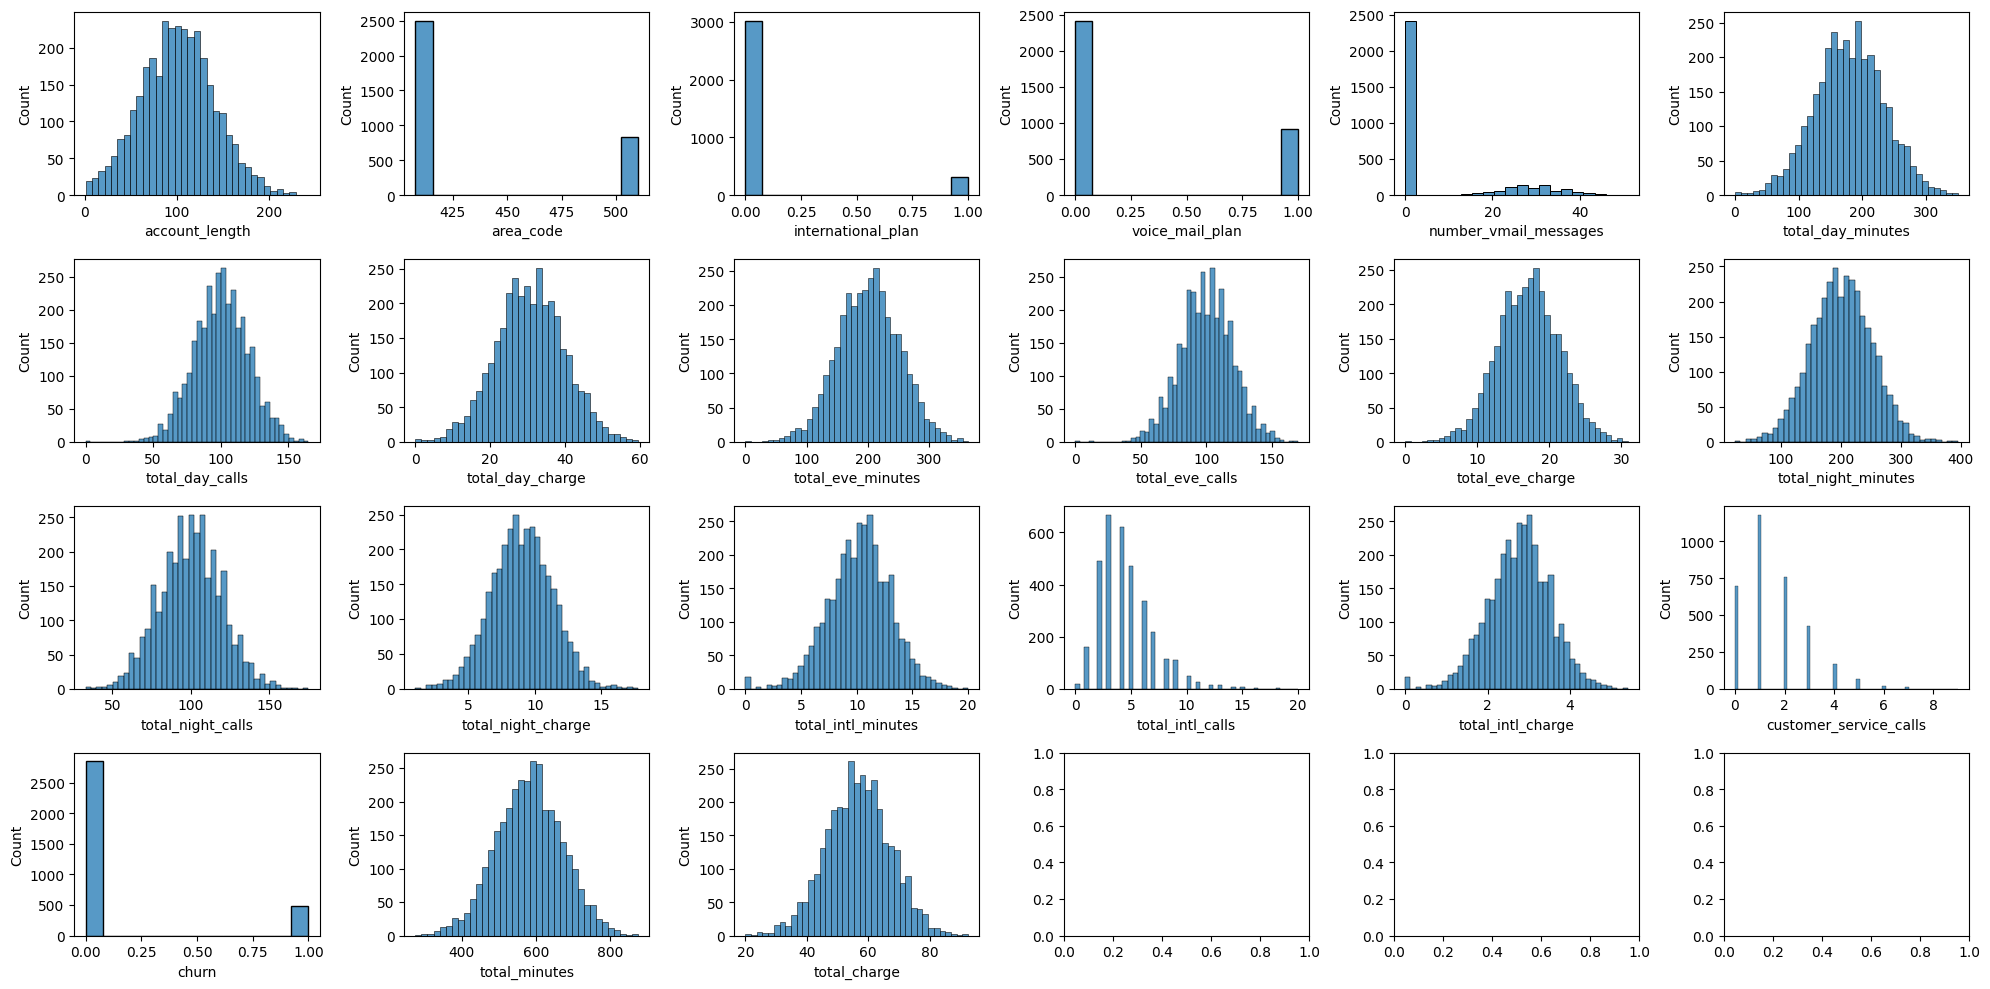

In [1019]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, feature in enumerate(numeric):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Target variable

Target variable is churn. It is a binary variable.

The dataset is imbalanced. Around 85% of target variable has a value of 0, and around 15% value of 1.

A dataset is considered imbalanced for regression tasks when the distribution of the target variable is skewed or has outliers that can disproportionately influence the model's performance. It can make the model biased towards more frequent values.

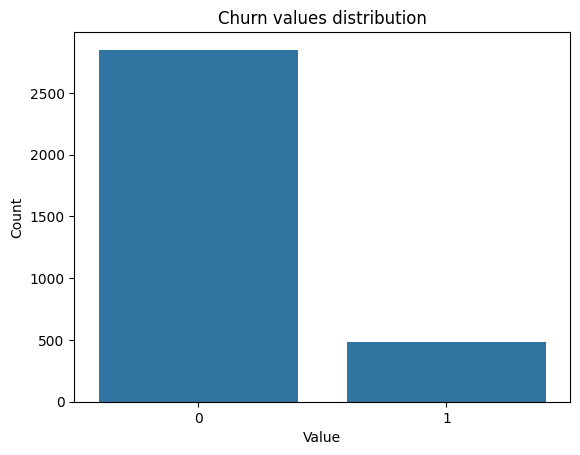

In [1020]:
sns.countplot(x='churn', data=df)
plt.title('Churn values distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [1021]:
df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

### Feature analysis

In [1022]:
# Create numeric and categorical lists

categorical = ['state','area_code','international_plan','voice_mail_plan', 'phone_number']

numerical = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
                'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']

We have three different area codes. 50% of clients are in area 415, 25% in area 510, 25% in area 408.

In [1023]:
df['area_code'].value_counts(normalize=True)

area_code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

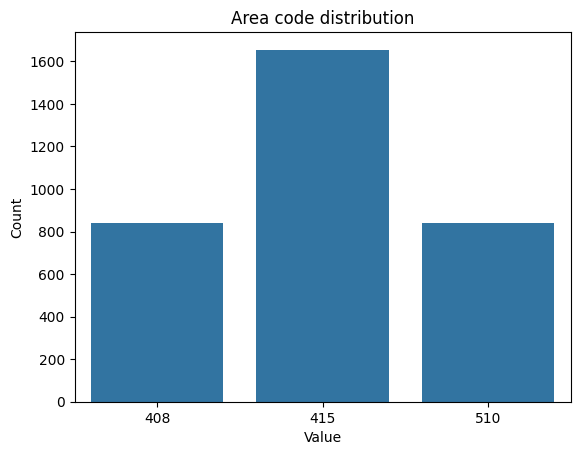

In [1024]:
sns.countplot(x='area_code', data=df)
plt.title('Area code distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

90% of clients dont have an international plan

In [1025]:
df['international_plan'].value_counts(normalize=True)

international_plan
0    0.90309
1    0.09691
Name: proportion, dtype: float64

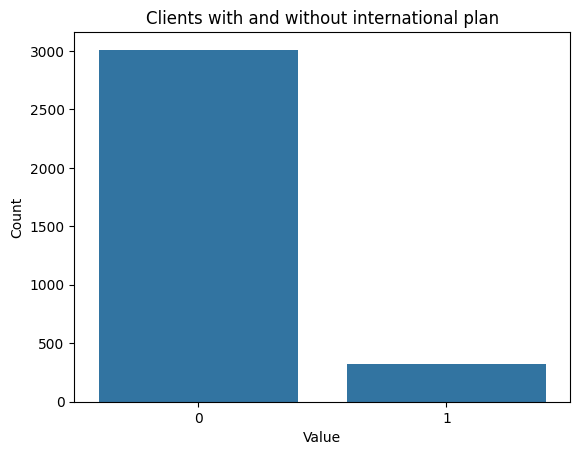

In [1026]:
sns.countplot(x='international_plan', data=df)
plt.title('Clients with and without international plan')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

27% of clients have voice mail plan and 72% dont have a voice mail plan

In [1027]:
df['voice_mail_plan'].value_counts(normalize=True)

voice_mail_plan
0    0.723372
1    0.276628
Name: proportion, dtype: float64

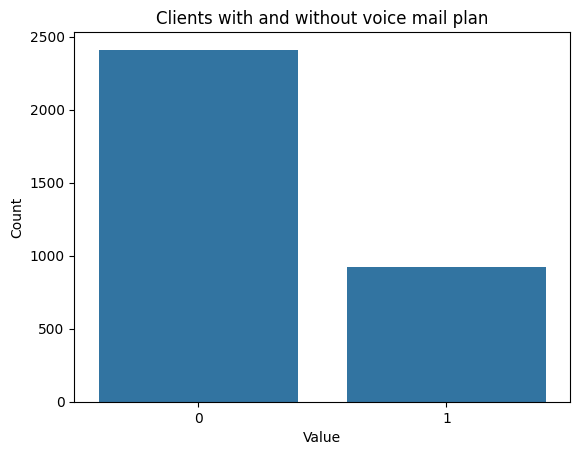

In [1028]:
sns.countplot(x='voice_mail_plan', data=df)
plt.title('Clients with and without voice mail plan')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Let's take a look at how clients are dictributed geographically among states.
Least amount of clients are located in California, most amount of clients are in West Virginia.

In [1029]:
df['state'].value_counts(normalize=True)

state
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: proportion, dtype: float64

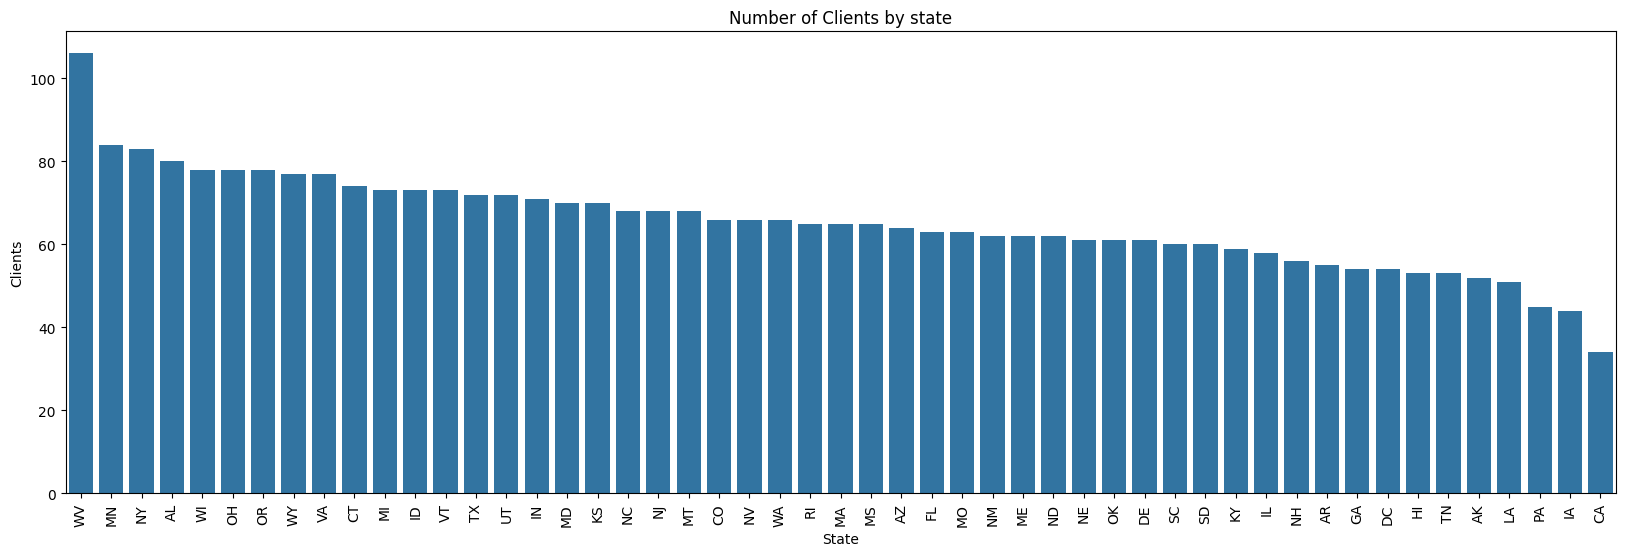

In [1030]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='state', data=df, order=df['state'].value_counts().index)

plt.title('Number of Clients by state')
plt.xlabel('State')
plt.ylabel('Clients')

plt.xticks(rotation=90)
plt.show()

### Multicollinearity

In order to detect multicollinearity we make a matrix of Pearson correlation coefficients among the predictor variables. High correlation coefficients (e.g., above 0.75) suggest multicollinearity.

We need to avoid multicollinearity because it can lead to unreliable and unstable estimates of regression coefficients, making it difficult to determine the effect of each independent variable on the dependent variable. This can also result in inflated standard errors, leading to a higher chance of failing to identify significant variables.


In [1031]:
#
numeric.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,...,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,-0.005080,0.000770
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,...,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.006259,-0.007083
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,...,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.024422,0.045191
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,...,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.014542,0.008689
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,...,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.014688,0.009572
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,...,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.611800,0.886698
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,...,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.004889,0.002121
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,...,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.611804,0.886701
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,...,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.560869,0.414508
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,...,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.001927,0.008781


In [1032]:
abs(numeric.corr()) > 0.75

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge
account_length,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
area_code,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
international_plan,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
voice_mail_plan,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
number_vmail_messages,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_day_minutes,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
total_day_calls,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_day_charge,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
total_eve_minutes,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
total_eve_calls,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


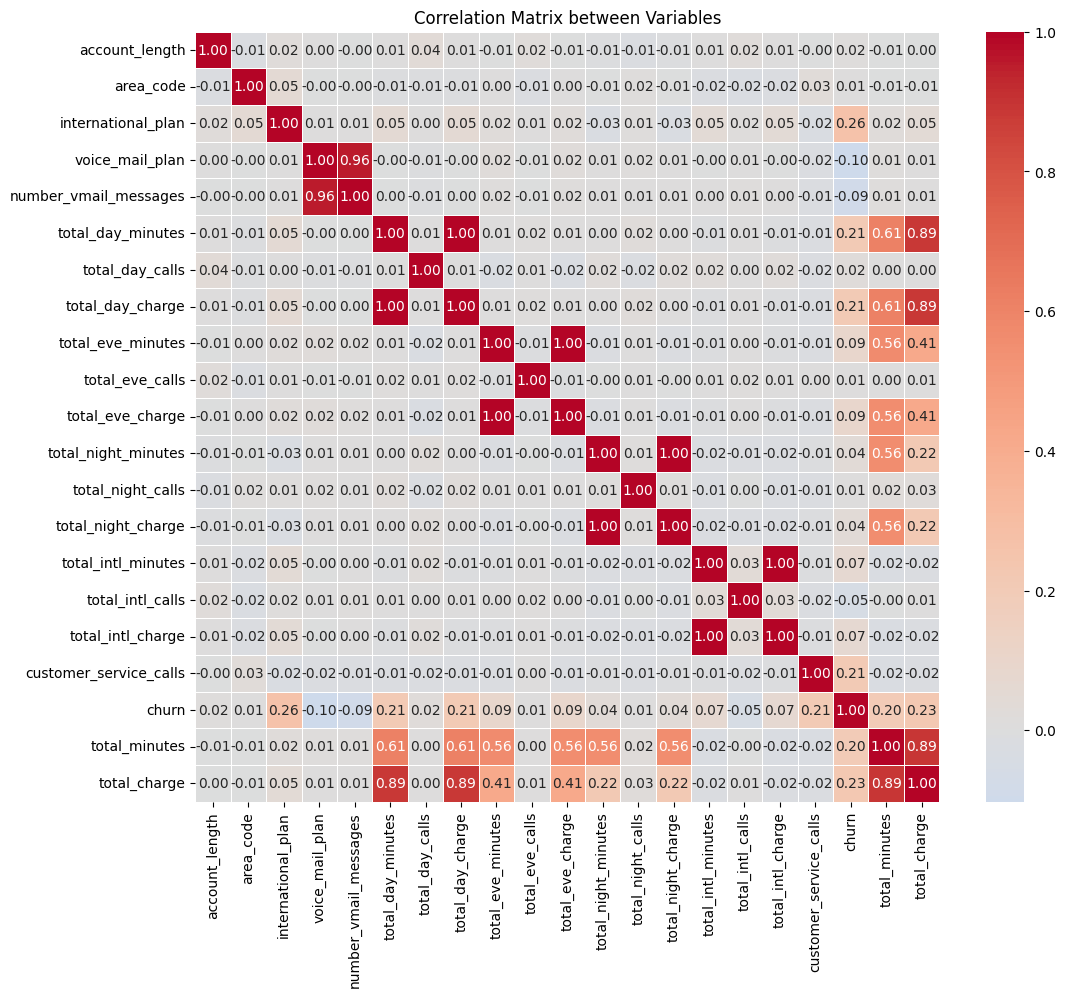

In [1033]:
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

### Dropping Columns/Feature Selection

This makes a lot of sense!! Of course we would see multicollinearity between features such as ''total_day_charge' and 'total_day_minutes'. They're basically telling us the same thing.

Let's drop columns we already deemed irrelevant, such as total_day_calls. They have a low correlation with our target variable, **churn**, which makes sense: the *number* of calls made doesn't matter so much as the *duration* and *charges* associated with each particular call. 

There was a *chance* these could have been helpful - what if someone has to make multiple calls, because the call keeps dropping due to techinical difficulties? However, due to the low correlations we can drop these columns. Then run the correlation matrix again.

In [1034]:
# Dropping from main and numeric dataframes
df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [1035]:
numeric.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

## Price-per-Minute Rate

We can drop columns related to charges, keeping the columns logging the number of 'minutes' spent on a call yet retain the information from both columns, if we create a **conversion rate** by determining how much a call costs per minute.

Let's first do for day, eve, and night, to make sure there's consistency of charge-per-minute depending on time of day.

In [1036]:
# Calculating cost per minute by time of day
df['minute_cost_day'] = df['total_day_charge'] / df['total_day_minutes']
df['minute_cost_eve'] = df['total_eve_charge'] / df['total_eve_minutes']
df['minute_cost_night'] = df['total_night_charge'] / df['total_night_minutes']

In [1037]:
df['minute_cost_day'].describe()

count    3331.000000
mean        0.170003
std         0.000028
min         0.169231
25%         0.169989
50%         0.170004
75%         0.170017
max         0.170513
Name: minute_cost_day, dtype: float64

In [1038]:
df['minute_cost_eve'].describe()

count    3332.000000
mean        0.085001
std         0.000016
min         0.084936
25%         0.084988
50%         0.085000
75%         0.085013
max         0.085075
Name: minute_cost_eve, dtype: float64

In [1039]:
df['minute_cost_night'].describe()

count    3333.000000
mean        0.045000
std         0.000017
min         0.044828
25%         0.044988
50%         0.045000
75%         0.045013
max         0.045111
Name: minute_cost_night, dtype: float64

Fantastic!! All of our standard deviations are incredibly low, implying the data is tightly clustered around our means and very reliable.

We'll run this for international calls as well, then create a dictionary to use as a reference key, if we need to calculate the price of a phone call by the number of minutes it took.

In [1040]:
df['minute_cost_intl'] = df['total_intl_charge']  / df['total_intl_minutes']
df['minute_cost_intl'].describe()

count    3315.000000
mean        0.270057
std         0.000329
min         0.268182
25%         0.269811
50%         0.270000
75%         0.270297
max         0.272727
Name: minute_cost_intl, dtype: float64

#### Creating Price-Per-Minute key

Let's create a "key", **ppm**, that we can refer to whenever we need to remember how much a phone call costs per minute, depending on time of day and whether or not the call was international. We'll use the mean values from our calculations above, given that our 'min-to-max' ranges and standard deviations were *very* small. 

In [1041]:
# Creating dictionary with price-per-minute info
ppm = {
    'day_ppm': 0.17,
    'eve_ppm': 0.085,
    'night_ppm': 0.045,
    'intl_ppm': 0.27
}

In [1042]:
# Adding this to our main 'keys' dictionary
keys['ppm'] = ppm

In [1043]:
# Dropping columns from df
df.drop(columns=['minute_cost_day', 'minute_cost_eve', 'minute_cost_night', 'minute_cost_intl'], axis=1, inplace=True)

#### Takeaways

It looks like calls made during the day are by far more expensive than calls made during the evening, or night. International calls are also far more expensive, but that is expected.

### Dropping Columns

Now, we can drop the columns related to charges. 

In [1044]:
# Dropping from main ataframe
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1, inplace=True)

There's multicollinearity between 'total_minutes' and 'total_charge'. For this particular metric, let's drop 'total_minutes'. We can calculate that based on our minutes info for each time of day, and it might be helpful to determine which customers paid more or less over the total time of their phone plan.

In [1045]:
df.drop('total_minutes', axis=1, inplace=True)

In [1046]:
numeric = df.select_dtypes(include=['float64','int64'])

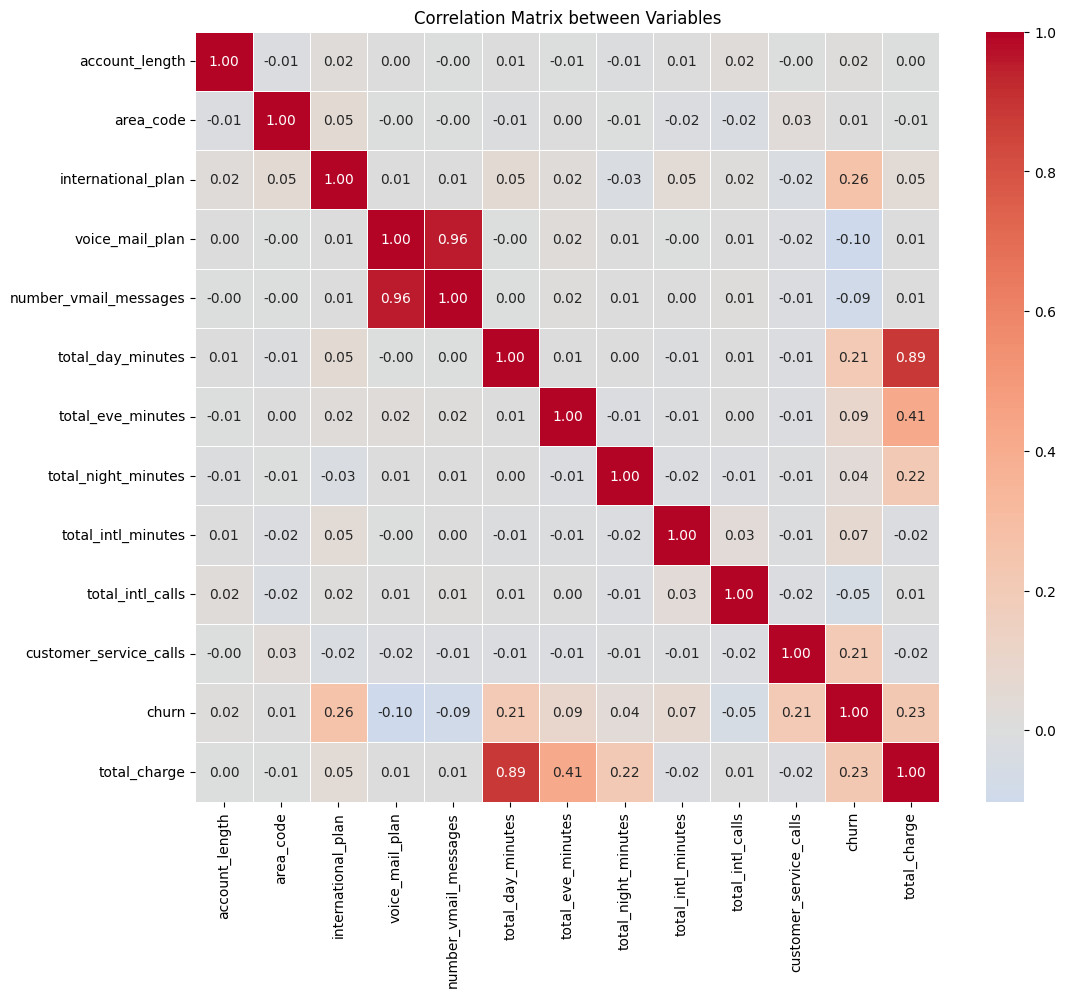

In [1047]:
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

Taking a closer second look...this matrix is super interesting. Our target variable 'churn' has a higher correlation with 'total_day_minutes' than the equivalent for evening or night calls...which makes sense given that we now know day phone-calls cost so much more.

However, we also know international phone calls are quite expensive, yet whether or not a person has an 'international_plan' seems to be far more impactful on churn than the 'total_intl_minutes' they spent calling. 

##### Intl # Calls vs. # Minutes

Furthermore, 'total_intl_minutes' has a positive correlation with churn, yet 'total_intl_calls' has a negative correlation.

Why is this?

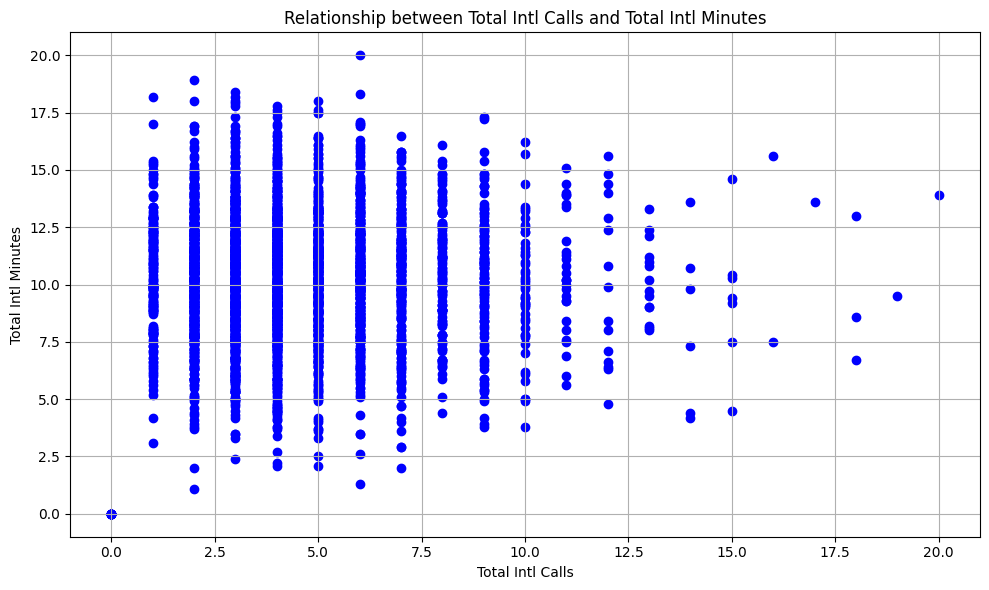

In [1048]:
# Plotting number of intl calls compared to number of intl minutes

plt.figure(figsize=(10, 6))
plt.scatter(df['total_intl_calls'], df['total_intl_minutes'], marker='o', color='b')
plt.xlabel('Total Intl Calls')
plt.ylabel('Total Intl Minutes')
plt.title('Relationship between Total Intl Calls and Total Intl Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

Interesting...Clearly there are outliers. Most of our data here is for customers who made 1-10 international calls.

Because # of intl calls is a discrete variable, let's plot this on a normalized bar graph and see how it compares to our graph above.

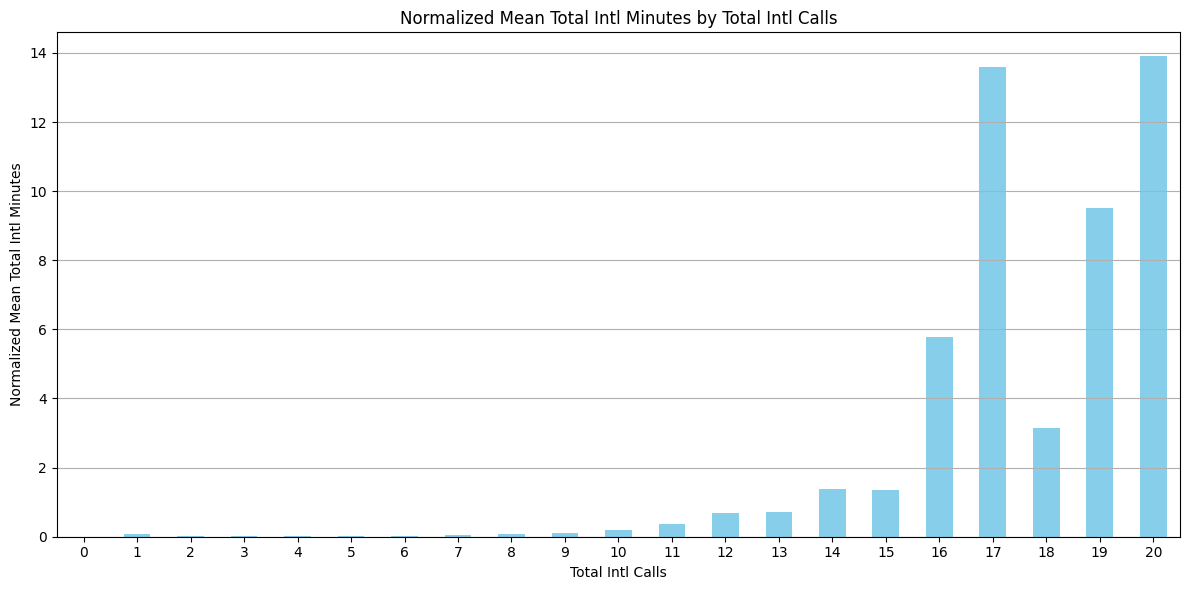

In [1049]:
# Grouping data by 'total_intl_calls' and calculating the mean 'total_intl_minutes' for each group
intl_calls_means = df.groupby('total_intl_calls')['total_intl_minutes'].mean()

# Calculating value counts for 'total_intl_calls'
intl_calls_counts = df['total_intl_calls'].value_counts()

# Normalizing by dividing means by value counts
normalized_means = intl_calls_means / intl_calls_counts

# Plotting the normalized data
plt.figure(figsize=(12, 6))
normalized_means.plot(kind='bar', color='skyblue')
plt.xlabel('Total Intl Calls')
plt.ylabel('Normalized Mean Total Intl Minutes')
plt.title('Normalized Mean Total Intl Minutes by Total Intl Calls')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()
plt.show()

In [1050]:
df['total_intl_calls'].value_counts(normalize=True)

total_intl_calls
3     0.200420
4     0.185719
2     0.146715
5     0.141614
6     0.100810
7     0.065407
1     0.048005
8     0.034803
9     0.032703
10    0.015002
11    0.008401
0     0.005401
12    0.004500
13    0.004200
15    0.002100
14    0.001800
18    0.000900
16    0.000600
19    0.000300
20    0.000300
17    0.000300
Name: proportion, dtype: float64

It doesn't look like there's an issue of international calls "cutting out" due to technical difficulties, leading to a higher frequency of calls that need to be made to complete a conversation.

We can therefore **drop total_intl_calls**.

In [1051]:
df.drop('total_intl_calls', axis=1, inplace=True)

Furthermore, if we remember back from our data understanding...most of our customers did **not** purchase an international plan...yet this is highly correlated with churn. Let's take a look at the numbers again.

In [1052]:
df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [1053]:
df['international_plan'].value_counts(normalize=True)

international_plan
0    0.90309
1    0.09691
Name: proportion, dtype: float64

### One hot encoding for area code and state

Baseline area code is 408. Baseline state is AK - alaska

# One Hot Encode for Area Code
df_area = df[['area_code']].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(df_area)
ohe.transform(df_area)
df_area_ohe = pd.DataFrame(
    data=ohe.transform(df_area),
    columns=[f"area_{cat}" for cat in ohe.categories_[0][1:]]
)
df_area_ohe
df = pd.concat([df, df_area_ohe], axis=1)
df

# 
df_state = df[['state']].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(df_state)
ohe.transform(df_state)
df_state_ohe = pd.DataFrame(
    data=ohe.transform(df_state),
    columns=[f"state_{cat}" for cat in ohe.categories_[0][1:]]
)
df_state_ohe
df = pd.concat([df, df_state_ohe], axis=1)
df

# One Hot Encode for Area Code

## Standardize: Standard scaler

Let's standardize our continous features in our data. These are all of our columns with dtype 'float64', which makes things easy.

(None of our 'int64' columns can be scaled this way, because they are all categorical, discrete, and **not ordinal**.)

# Example: Assuming df contains your DataFrame with numerical columns
float_cols = df.select_dtypes(include=['float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric columns
df[float_cols] = scaler.fit_transform(df[float_cols])

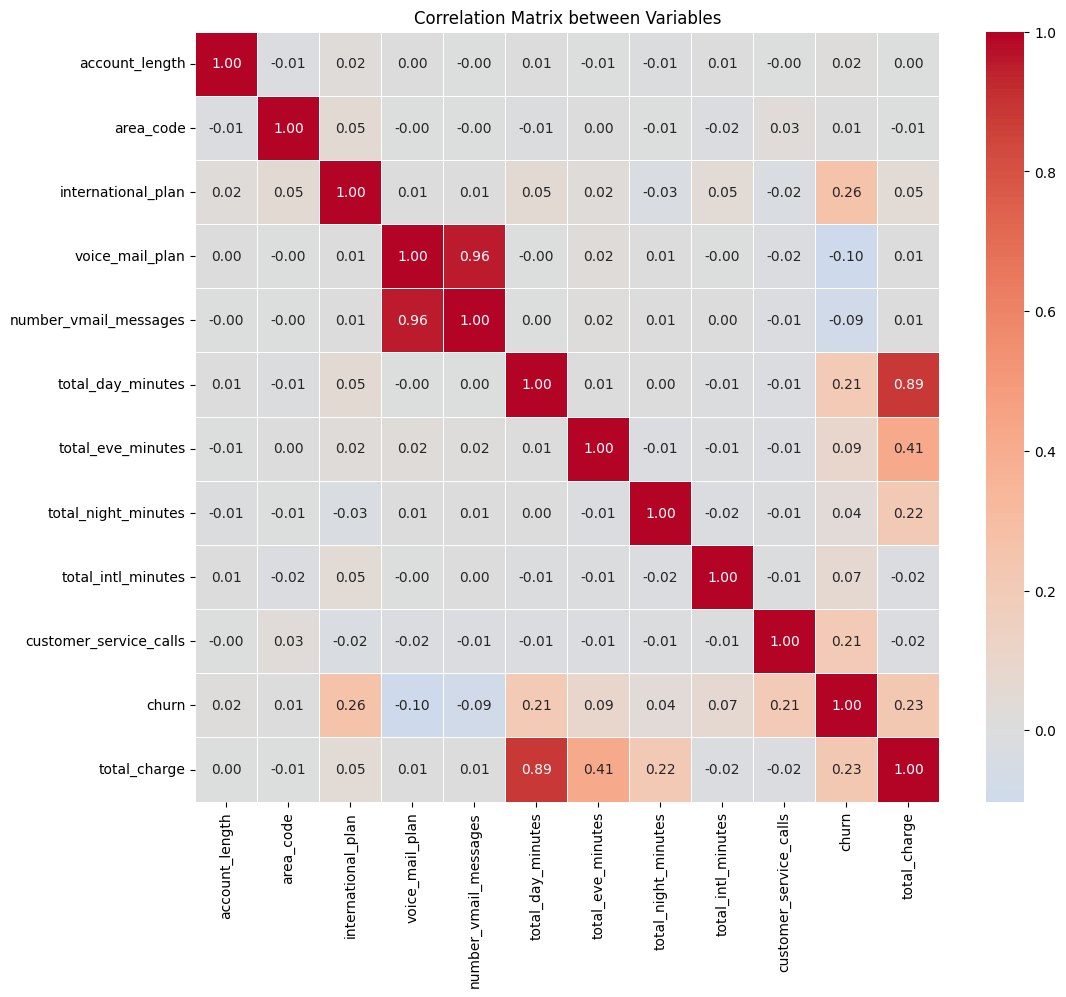

In [1054]:
numeric = df.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

# Logistic Regression

#### Imbalanced Dataset: SMOTE

Let's start running regression models, and see if this helps us better understand our data. 

Because our data is **imbalanced** with regards to our target variable 'churn', let's use SMOTE to handle this imbalance.

In [1055]:
# Assuming 'numeric' is your dataframe with numeric features and 'churn' is the target variable

# Split data into features (X) and target variable (y)
X = numeric.drop('churn', axis=1)  # Features
y = numeric['churn']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explore target column breakdown in train data

In [1056]:
# Code to explore
y_train.value_counts(normalize=True)

churn
0    0.856714
1    0.143286
Name: proportion, dtype: float64

How accurate would that baseline be on test data?

In [1057]:
# Code to find the answer
y_test.value_counts(normalize=True)

churn
0    0.848576
1    0.151424
Name: proportion, dtype: float64

In [1058]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1059]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

##### Logistic Regression

Regularization Strength - Identifying C value.

Let's start with the default of C=1.0. If our dataset is noisy or complex, and we suspect underfitting, we can increase C and allow the model to fit the training data more closely. If we suspect overfitting, the opposite will be true.

solver = 'lbfgs' (default max_iter of 100). 

In [1060]:
y_train_smote.value_counts()

churn
0    2284
1    2284
Name: count, dtype: int64

In [1061]:
# Initialize logistic regression model
logreg = LogisticRegression(solver='lbfgs', random_state=42)

### Finding Best Parameters Using Cross-Validation Grid Search

In [1062]:
param_grid = {'C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Evaluate best model
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



In [1063]:
# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1}


In [1064]:
# Apply logistic regression using optimal parameters

In [1065]:
# Create logistic regression with C=0.1
logreg = LogisticRegression(C=0.1, solver='lbfgs', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



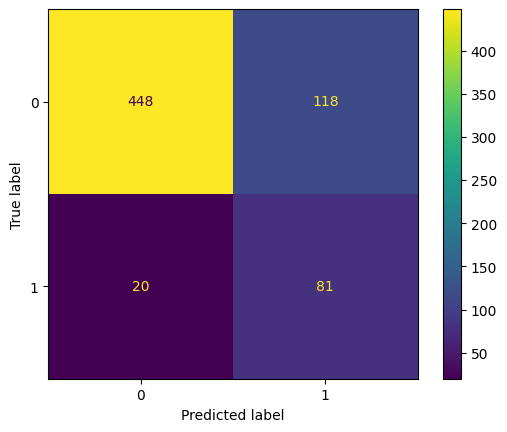

In [1066]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

In [1067]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



### Logistic Regression: Model Interpretation

***Confusion Matrix***...

TN (True Negative): 382 predicted no-churn (0), and actually no-churn (1)

FP (False Positive): 184 predicted churn (1) but actually no-churn (0)

FN (False Negative): 13 predicted no-churn (0) but actually churn (1)

TP (True Positive): 88 predicted churn (1) and actually churn (1)


***Classification Report***...

Precision (ratio correctly predicited positive to total predicted positive)...for no-churn (0) it's 0.97. For churn (1), it's 0.32.

Recall (ratio correctly predicted positive observations to all observations in actual class)...for no-churn (0) it's 0.67. For churn (1) it's 0.87.

F1-score ("harmonic mean of precision and recall")...for no-churn (0) it's 0.80, for churn (1) it's 0.47

Accuracy (proportion of correctly predicted instances out of total instances)


High no-churn (0) precision, but lower recall for churn (1) indicates this model might correctly ideintify no-churn customers more often than churn one. Our lower F1-score for churn (1), further indicates there's room for improvement in predicting churned customers.


Hyperparameter Tuning - Cross Validation

### Calculate ROC-AUC

In [1068]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.833922261484099)

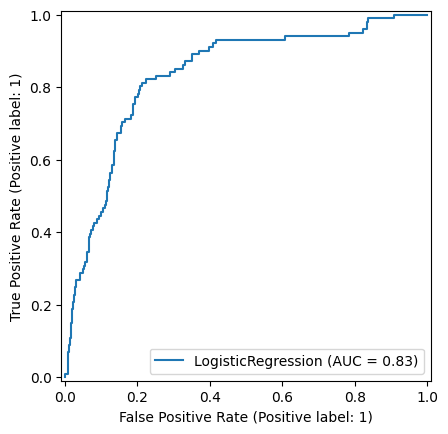

In [1069]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

# Decision Tree

We'll account for an imbalance in our dataset using class_weight.

In [1070]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the original testing data
y_pred = dt.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.76      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



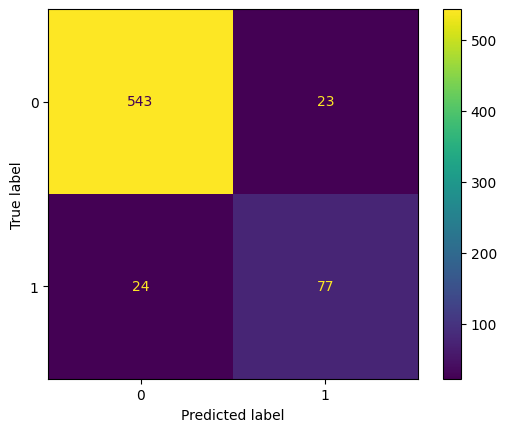

In [1071]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [1072]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.76      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



In [1073]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.8608700976104677)

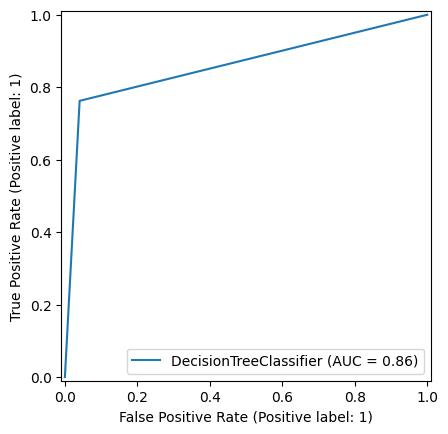

In [1074]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt, X_test, y_test);

### Visualizing Decision Tree - Feature Importance

Let's use our decision tree model to figure out what features are most important in predicting our target variable. We can then visualize these features.

In [1075]:
importances = dt.feature_importances_
feature_names = X_train.columns
feature_importance_pairs = list(zip(feature_names, importances))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)  # Sort by importance
top_features = [pair[0] for pair in feature_importance_pairs[:5]]  # Select top 5 features

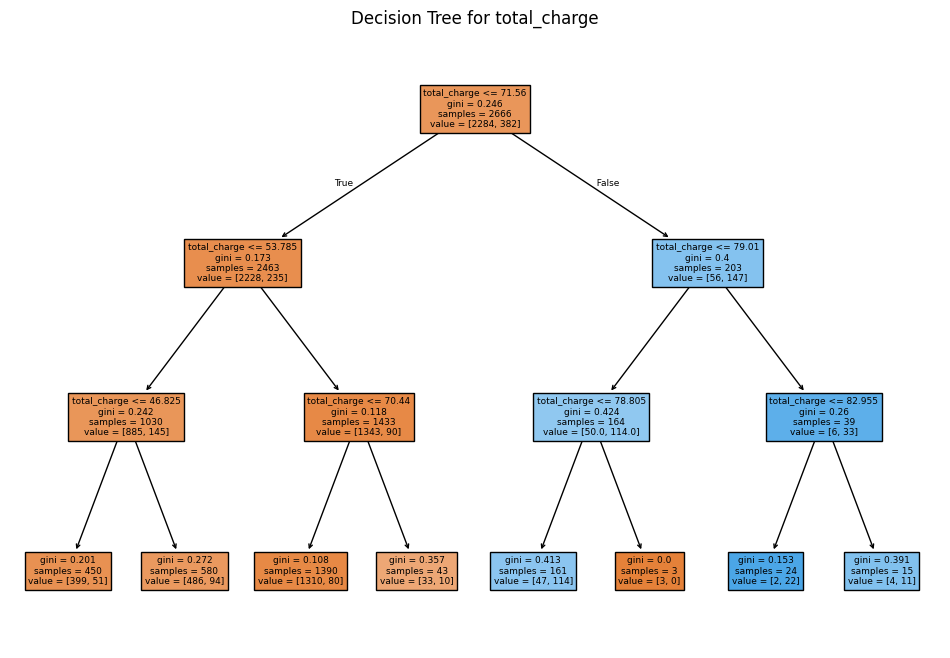

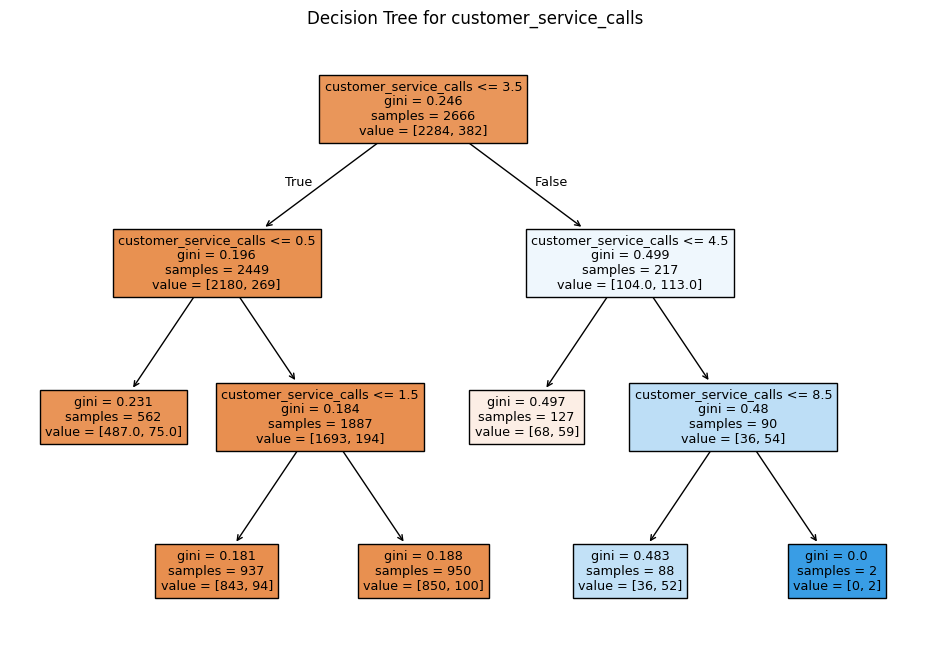

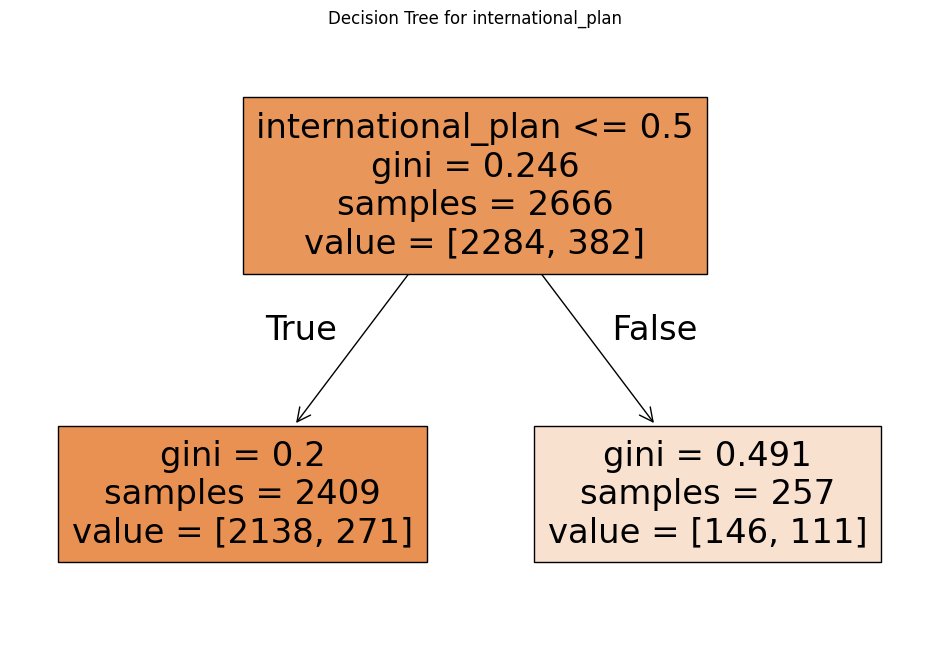

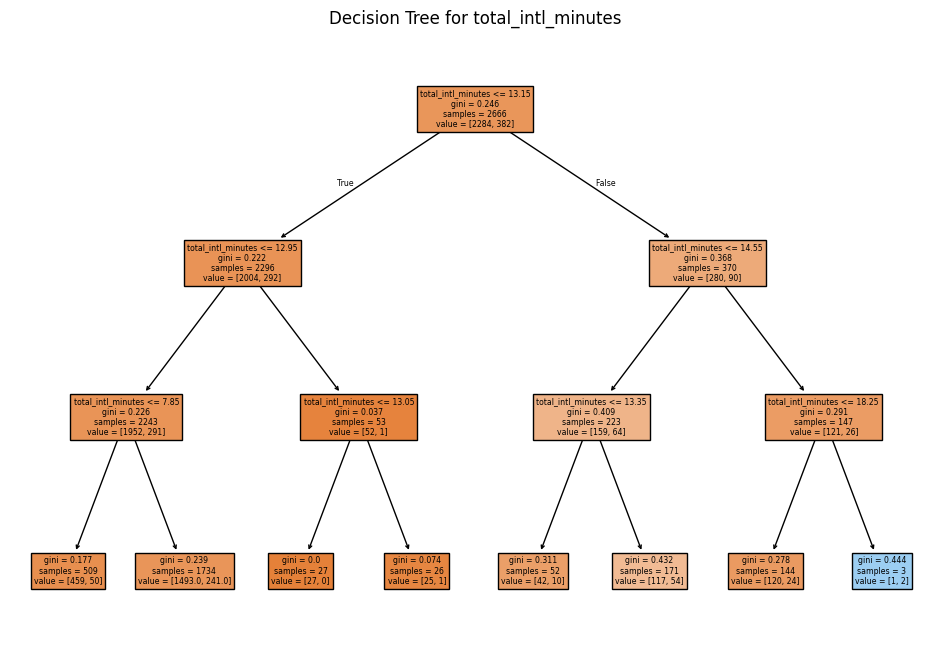

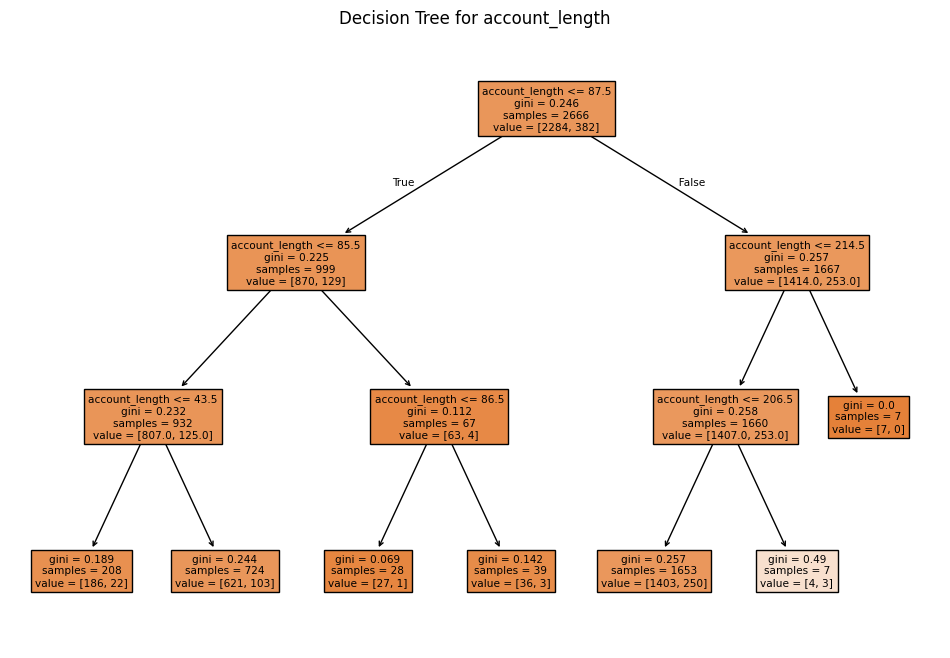

In [1076]:
# Plot
for feature in top_features:
    plt.figure(figsize=(12, 8))
    dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for clearer visualization
    dt.fit(X_train[[feature]], y_train)
    plot_tree(dt, feature_names=[feature], filled=True)
    plt.title(f"Decision Tree for {feature}")
    plt.show()

# Feature Tuning

This is really interesting, and makes a lot of sense when you think about it. At first glance, it might seem confusing that customers with a **lower** total_charge are **more** likely to churn. Same for total_intl_minutes, or number of customer_service_calls...these seem like features that would indicate higher financial distress and/or greater technical difficulties for a person, which would in turn seem to predict churn.

However, **if a person does churn, they are likely to have lower account_length, which would make for lower numbers in all other numeric features**. We need to create new features that account for this, then run these models again.

### New Dataframe, with Normalized Features accounting for differences in account_length.

Let's create a new dataframe, with columns that account for differences in account length.

In [1077]:
# Creating dataframe with normalized columns by account_length
norm_df = df.copy()
norm_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,churn,total_charge
0,KS,128,415,0,1,25,265.1,197.4,244.7,10.0,1,0,72.86
1,OH,107,415,0,1,26,161.6,195.5,254.4,13.7,1,0,55.54
2,NJ,137,415,0,0,0,243.4,121.2,162.6,12.2,0,0,59.00
3,OH,84,408,1,0,0,299.4,61.9,196.9,6.6,2,0,65.02
4,OK,75,415,1,0,0,166.7,148.3,186.9,10.1,3,0,49.36


In [1078]:
# Shortening column names for clarity - remembering we are only focusing on the total 'minutes' per time of day, 
# since we can calculate the total charge 
norm_df['perc_daymin_daily'] = norm_df['total_day_minutes'] / norm_df['account_length']

norm_df['perc_evemin_daily'] = norm_df['total_eve_minutes'] / norm_df['account_length']

norm_df['perc_nightmin_daily'] = norm_df['total_night_minutes'] / norm_df['account_length']

norm_df['perc_intlmin_daily'] = norm_df['total_intl_minutes'] / norm_df['account_length']

### Customer Service Calls & Vmail Messages -- Per Week

For a feature such as customer_service_calls, it will be more helpful for our stakeholders if we normalize by account_length by calculating the average number of customer service calls across a larger span of time. It's very rare that someone makes multiple customer service calls a day. 

We'll first try to find the percent of customer service calls made **weekly** by a customer. We can adjust depending on how helpful our numbers are.

We'll do the same for voicemail messages. As these are also far less-frequent per-day than "number of minutes" spent on a call. 

In [1079]:
# Make a new column calculating the number of weeks a customer was active
norm_df['weeks_active'] = norm_df['account_length'] / 7

norm_df['perc_custservice_weekly'] = norm_df['customer_service_calls'] / norm_df['weeks_active']

norm_df['perc_vmail_weekly'] = norm_df['number_vmail_messages'] / norm_df['weeks_active']

### Comparing Customer Engagement

It will be helpful, from a predictive standpoint, to give our stakeholders the ability to compare a customer's activity (ex. minutes spent on the phone per day) with the average customer activity...that way we can take new customers and determine how likely they are to churn or not-churn depending on where they fall in comparison to the rest of the customer base.

We can do this by calculating the average total_minutes spent calling by all the rows in our dataframe...then calculate each individual customer's standard deviation away from this mean.

In [1080]:
norm_df['perc_totalmin_daily'] = norm_df['perc_daymin_daily'] + norm_df['perc_evemin_daily'] + norm_df['perc_nightmin_daily']

# Calculating mean of total_minutes for entire dataframe
mean_total_minutes = norm_df['perc_totalmin_daily'].mean()

# Calculate the deviation from the mean 
norm_df['calltime_deviation_from_mean'] = norm_df['perc_totalmin_daily'] - mean_total_minutes

Let's do the same thing for our other normalized columns - perc_intlmin_daily, cust_service_norm, and num_vmail_norm

In [1081]:
# Calculating percentage international minutes a day
mean_intl_minutes = norm_df['perc_intlmin_daily'].mean()
norm_df['intlmin_deviation_from_mean'] = norm_df['perc_intlmin_daily'] - mean_intl_minutes

# Customer service calls per week deviation
mean_weekly_custservice = norm_df['perc_custservice_weekly'].mean()
norm_df['custservice_weekly_deviation'] = norm_df['perc_custservice_weekly'] - mean_weekly_custservice

# Number voicemails per week deviation
mean_weekly_vmail = norm_df['perc_vmail_weekly'].mean()
norm_df['vmail_weekly_deviation'] = norm_df['perc_vmail_weekly'] - mean_weekly_vmail

In [1082]:
norm_df.drop('total_day_minutes', axis=1, inplace=True)
norm_df.drop('total_eve_minutes', axis=1, inplace=True)
norm_df.drop('total_night_minutes', axis=1, inplace=True)
norm_df.drop('total_intl_minutes', axis=1, inplace=True)
norm_df.drop('customer_service_calls', axis=1, inplace=True)
norm_df.drop('number_vmail_messages', axis=1, inplace=True)

In [1083]:
norm_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,churn,total_charge,perc_daymin_daily,perc_evemin_daily,perc_nightmin_daily,perc_intlmin_daily,weeks_active,perc_custservice_weekly,perc_vmail_weekly,perc_totalmin_daily,calltime_deviation_from_mean,intlmin_deviation_from_mean,custservice_weekly_deviation,vmail_weekly_deviation
0,KS,128,415,0,1,0,72.86,2.071094,1.542188,1.911719,0.078125,18.285714,0.054688,1.367188,5.525000,-3.602896,-0.078866,-0.117001,0.431033
1,OH,107,415,0,1,0,55.54,1.510280,1.827103,2.377570,0.128037,15.285714,0.065421,1.700935,5.714953,-3.412943,-0.028954,-0.106268,0.764780
2,NJ,137,415,0,0,0,59.00,1.776642,0.884672,1.186861,0.089051,19.571429,0.000000,0.000000,3.848175,-5.279721,-0.067940,-0.171688,-0.936155
3,OH,84,408,1,0,0,65.02,3.564286,0.736905,2.344048,0.078571,12.000000,0.166667,0.000000,6.645238,-2.482658,-0.078420,-0.005022,-0.936155
4,OK,75,415,1,0,0,49.36,2.222667,1.977333,2.492000,0.134667,10.714286,0.280000,0.000000,6.692000,-2.435896,-0.022325,0.108312,-0.936155


Let's look at our state breakdown with these new normalized numbers.

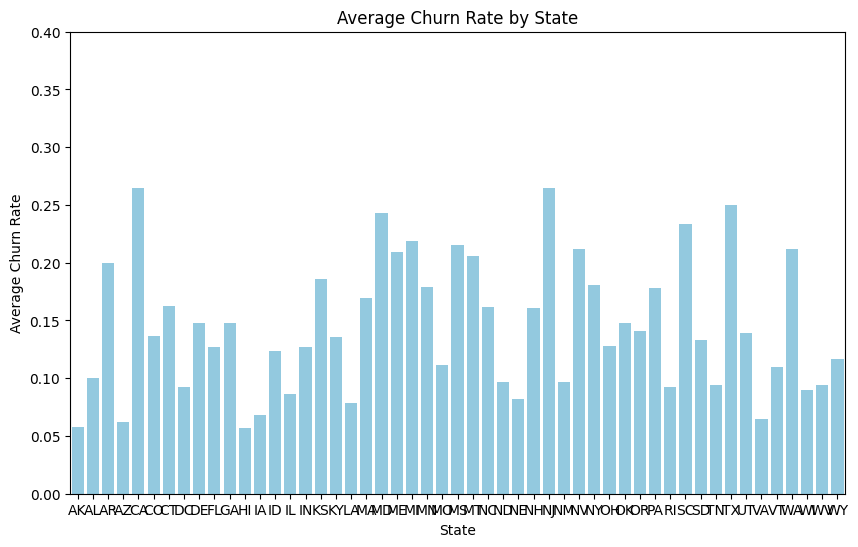

In [1084]:
# Calculate average churn rate by state
avg_churn_by_state = norm_df.groupby('state')['churn'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='churn', data=avg_churn_by_state, color='skyblue')
plt.title('Average Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.ylim(0.0, 0.4)  # Set y-axis limit
plt.show()

### Minutes VS. Charge

Let's revisit our decision to drop total_minutes as opposed to total_charge. On second thought, this wasn't a great idea because total_charge is helpful in interpreting our predictions, but not making the predictions themselves...we're interested in *customer behavior* that predicts churn, not the outcome of this behavior (such as charge).

In [1085]:
# Dropping total_charge
norm_df.drop('total_charge', axis=1, inplace=True)

#### Feature Selects

Let's make another dataframe norm_selects, with selections of all the features we think we might need to predict churn (ex. something like 'account_length' is not helpful, because this again is hindsight bias rather than a predictive variable).

In [1086]:
norm_df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn', 'perc_daymin_daily', 'perc_evemin_daily',
       'perc_nightmin_daily', 'perc_intlmin_daily', 'weeks_active',
       'perc_custservice_weekly', 'perc_vmail_weekly', 'perc_totalmin_daily',
       'calltime_deviation_from_mean', 'intlmin_deviation_from_mean',
       'custservice_weekly_deviation', 'vmail_weekly_deviation'],
      dtype='object')

In [1087]:
norm_selects = norm_df.drop(columns=['account_length', 'weeks_active'], axis=1)

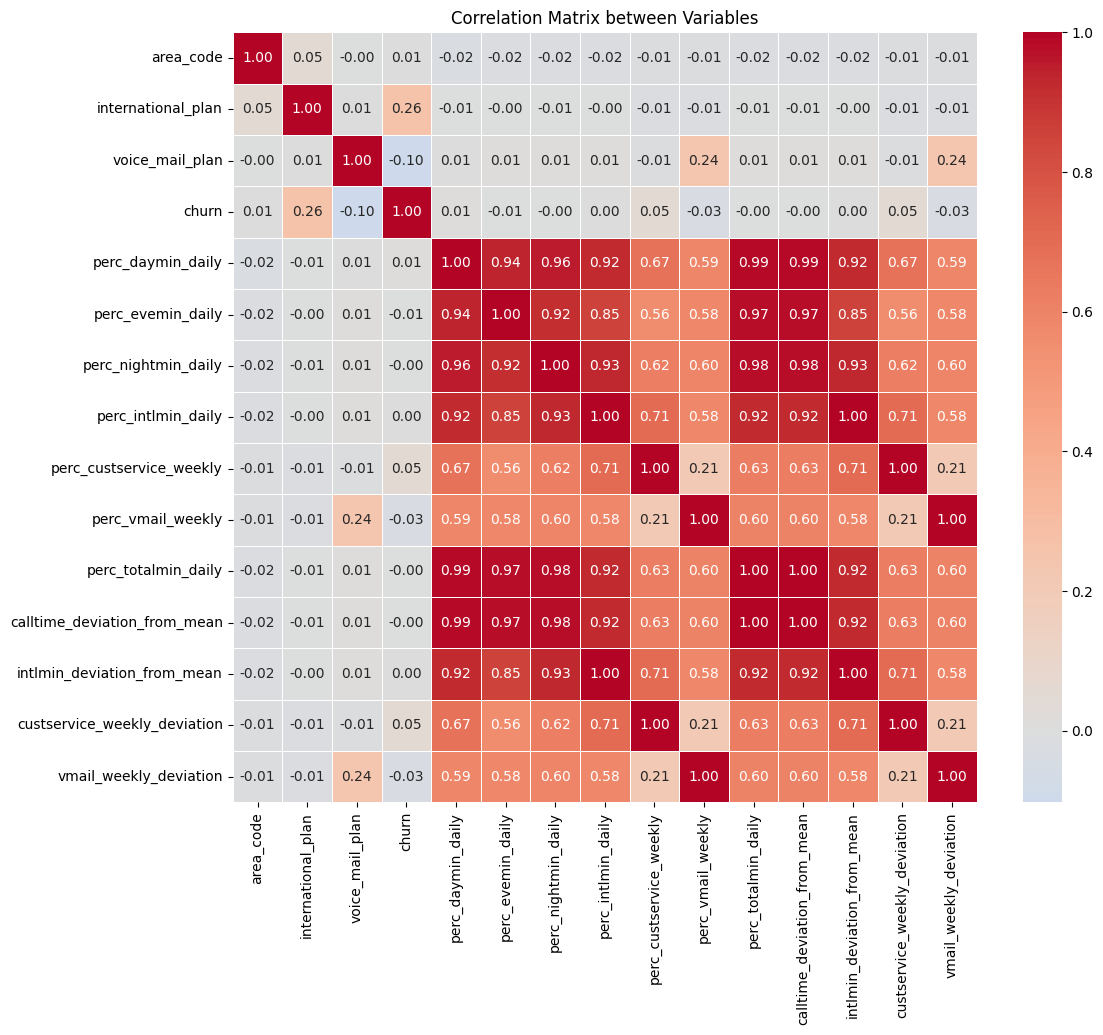

In [1088]:
# Plotting correlation matrix with normalized data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = norm_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

### Lack of Target Variable Correlation

Our new normalized features seem to have very minimal correlation with our target variable, 'churn'. This could be because they have complex, non-linear relationships. Let's use decision trees again. 

We need to account for imbalanced data. We'll use class_weight.

In [1089]:
# X contains your features, and y is your target variable
X = norm_numeric.drop('churn', axis=1)
y = norm_numeric['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       566
           1       0.38      0.34      0.36       101

    accuracy                           0.82       667
   macro avg       0.63      0.62      0.63       667
weighted avg       0.81      0.82      0.81       667



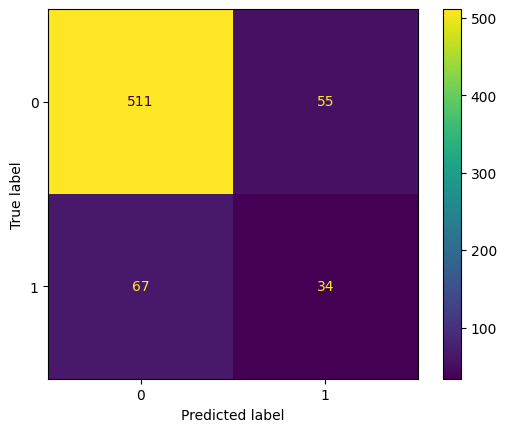

In [1090]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [1091]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       566
           1       0.38      0.34      0.36       101

    accuracy                           0.82       667
   macro avg       0.63      0.62      0.63       667
weighted avg       0.81      0.82      0.81       667



In [1092]:
importances = dt.feature_importances_
feature_names = X_train.columns
feature_importance_pairs = list(zip(feature_names, importances))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)  # Sort by importance
top_features = [pair[0] for pair in feature_importance_pairs[:5]]  # Select top 5 features

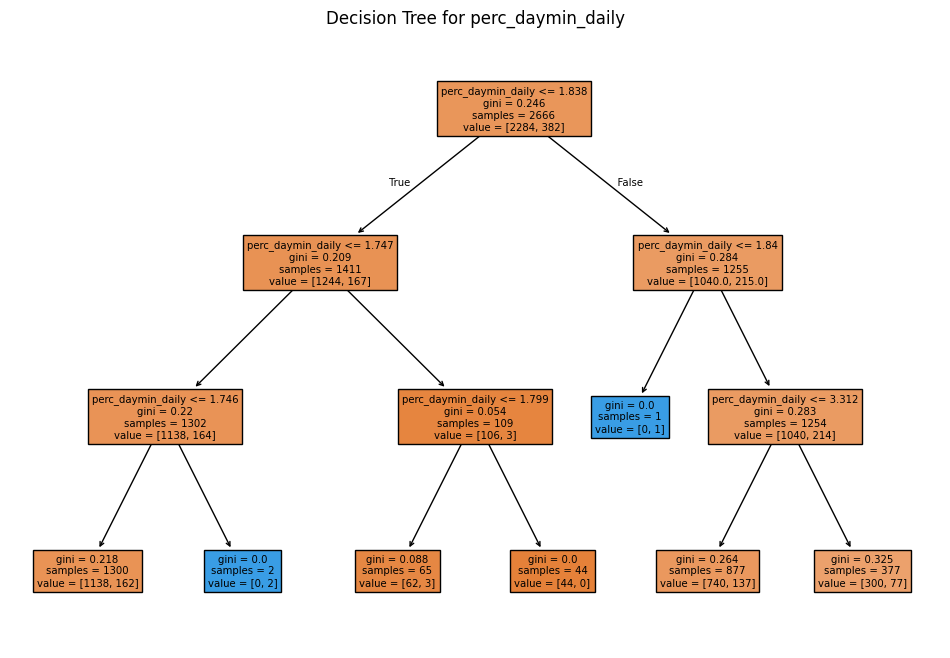

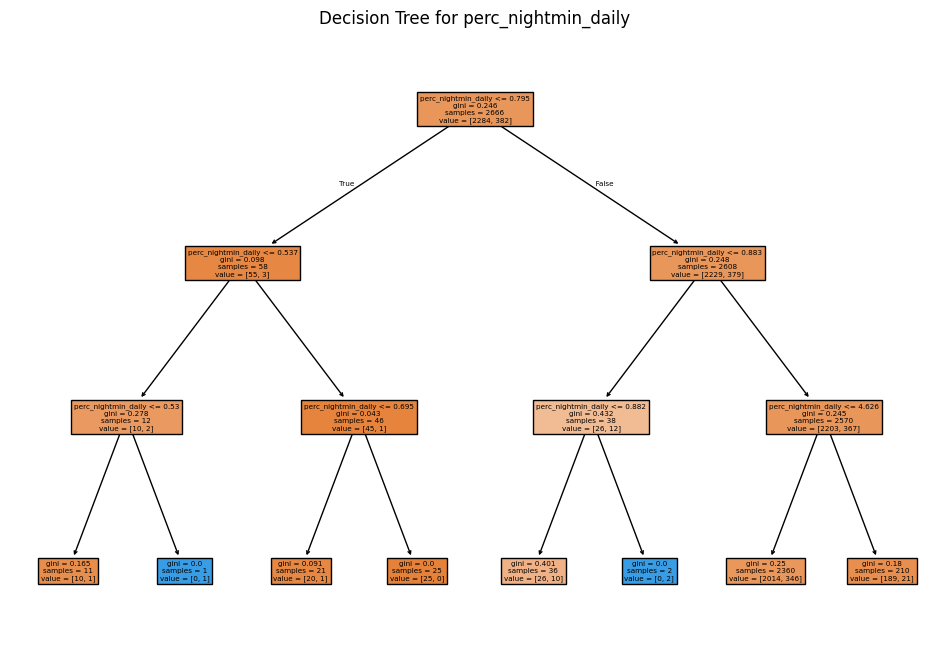

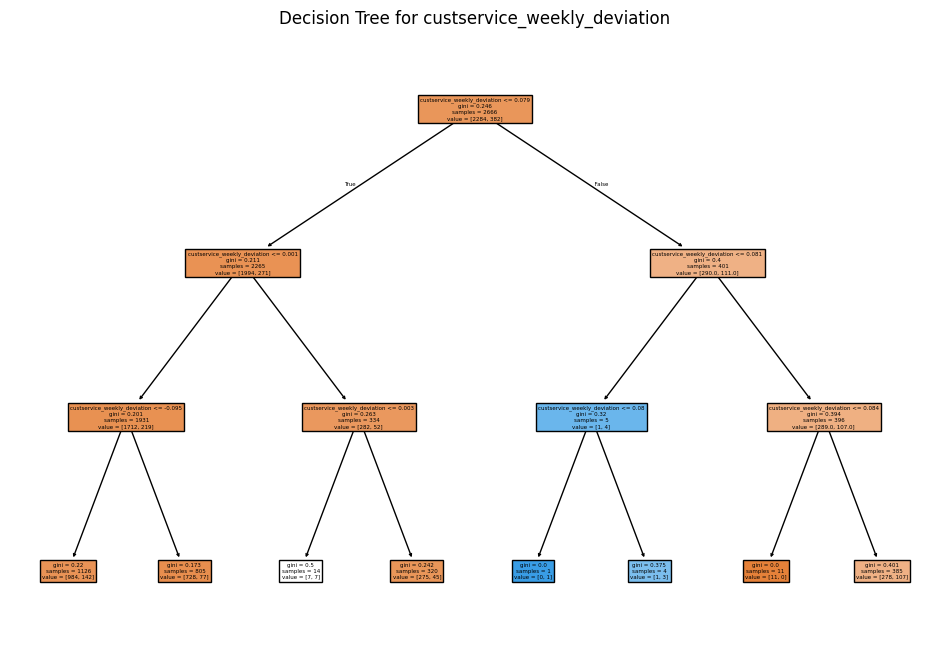

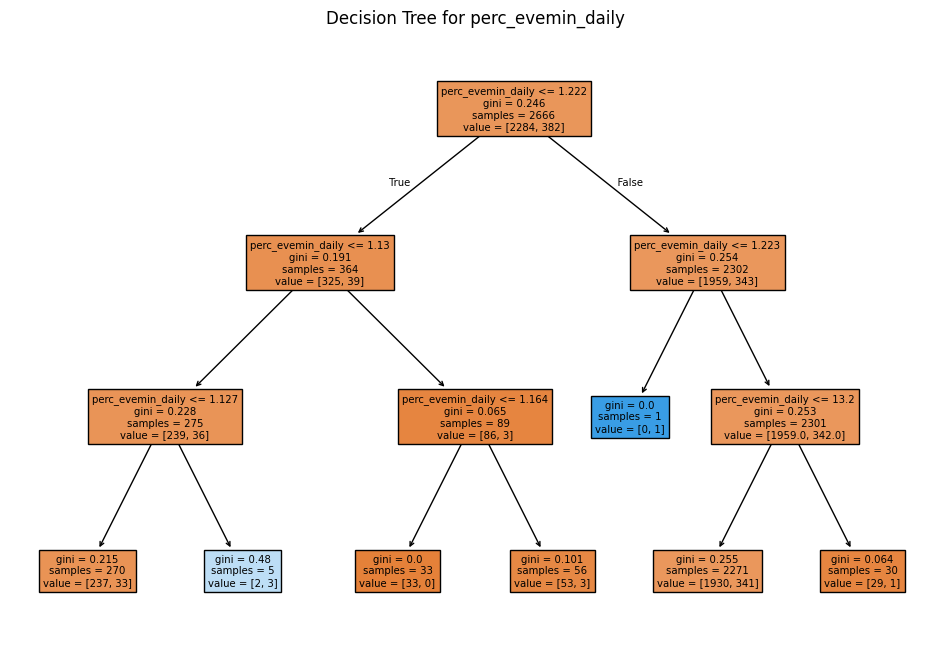

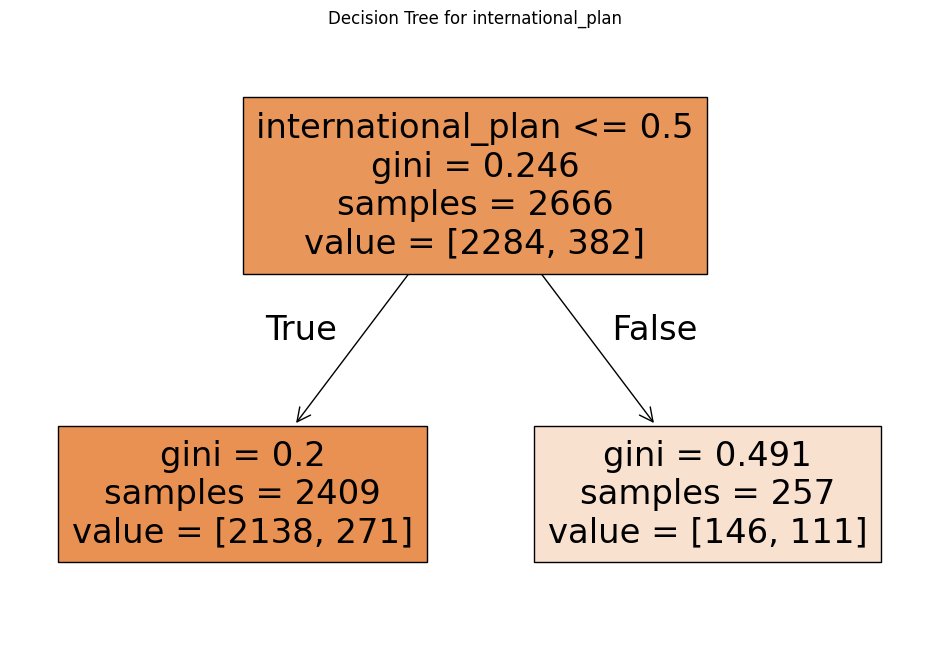

In [1093]:
# Plot
for feature in top_features:
    plt.figure(figsize=(12, 8))
    dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for clearer visualization
    dt.fit(X_train[[feature]], y_train)
    plot_tree(dt, feature_names=[feature], filled=True)
    plt.title(f"Decision Tree for {feature}")
    plt.show()

# Feature Importance 

Let's try and find our most important features. We can apply this to a few different models.

In [1094]:
# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(feature_importances_df.head(10))

Top 10 Most Important Features:
                         Feature  Importance
3              perc_daymin_daily    0.195736
5            perc_nightmin_daily    0.124538
12  custservice_weekly_deviation    0.116827
4              perc_evemin_daily    0.106447
1             international_plan    0.088066
6             perc_intlmin_daily    0.078218
7        perc_custservice_weekly    0.059523
11   intlmin_deviation_from_mean    0.059251
13        vmail_weekly_deviation    0.052895
9            perc_totalmin_daily    0.046115


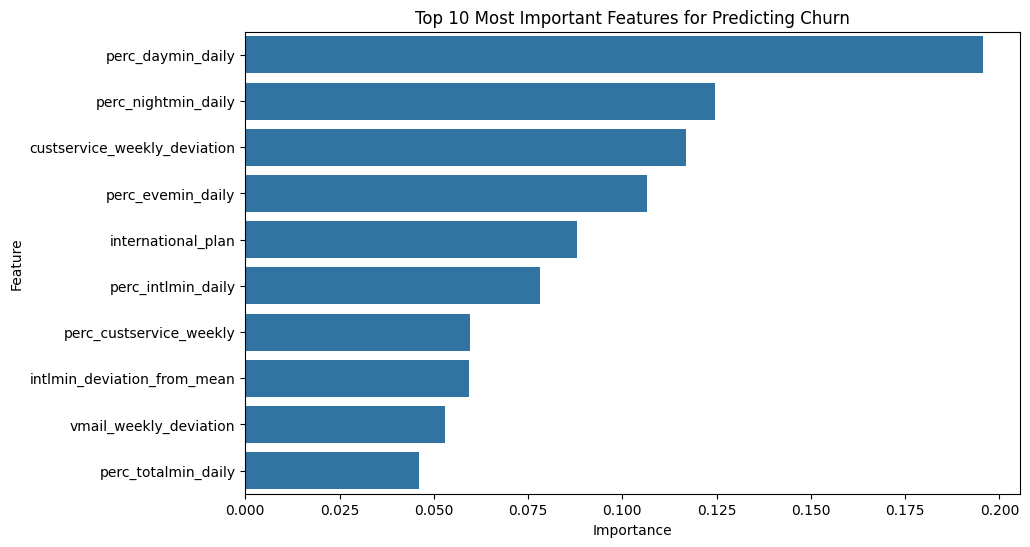

In [1095]:
# Visualize

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Random Forest

Let's try with a Random Forest model. Accounting for imbalanced data once again with class_weight.

In [1096]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(feature_importances_df.head(10))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       566
           1       0.70      0.16      0.26       101

    accuracy                           0.86       667
   macro avg       0.78      0.57      0.59       667
weighted avg       0.84      0.86      0.82       667

Top 10 Most Important Features:
                         Feature  Importance
3              perc_daymin_daily    0.125178
12  custservice_weekly_deviation    0.101910
7        perc_custservice_weekly    0.100224
5            perc_nightmin_daily    0.090519
1             international_plan    0.086564
10  calltime_deviation_from_mean    0.084650
11   intlmin_deviation_from_mean    0.084537
6             perc_intlmin_daily    0.083878
9            perc_totalmin_daily    0.082579
4              perc_evemin_daily    0.078295


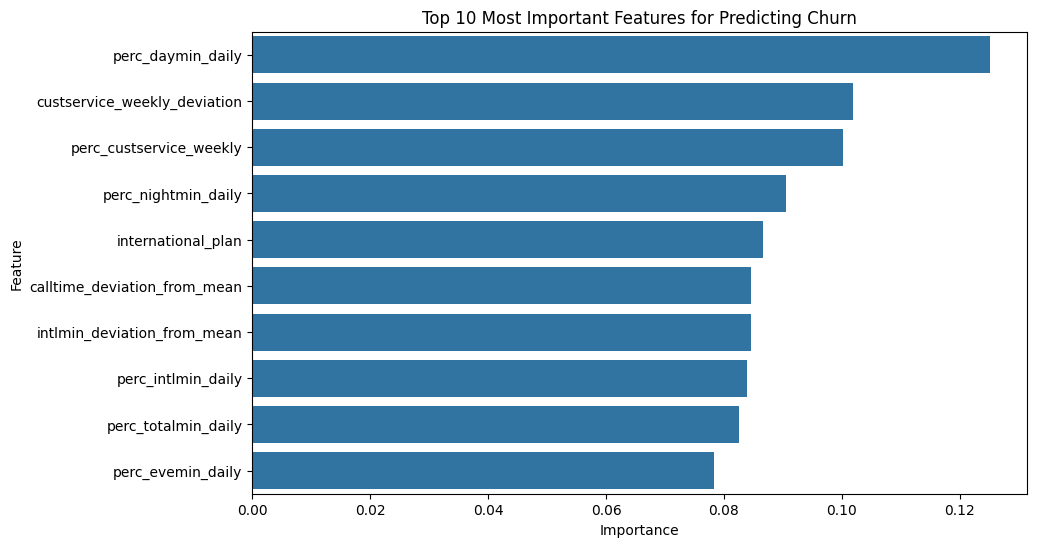

In [1097]:
# Visualize most important features

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the top N most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest is usually more reliable for feature selection than Decision Tree. Here is a breakdown of some of the depicted features above:

**perc_custservice_weekly**: Let's drop 'perc_custservice_weekly', since it correlates with 'custservice_weekly_deviation'. Both had correlations of 0.5 with 'churn' in our correlation matrix, yet the latter was identified as more important in both our Decision Tree and Random Forest exploration.

**per_daymin_daily**: This seems to be our most important feature, which makes sense given that we know 'total_charge' was highly correlated with 'churn' and that daytime calls cost more than calls made in eve or night. We'll focus on 'perc_daymin_daily', and drop the equivalent values for eve and night, since day calls are indicative of higher charges as well. We'll keep 'perc_totalmin_daily', to still account for evening and night calls.

**international data**: It's unclear whether 'intlmin_deviation_from_mean' or 'perc_intlmin_daily' will be more helpful. We'll keep both for now.

In [1098]:
# Dropping columns from norm_selects
norm_selects = norm_selects.drop(columns=['perc_custservice_weekly', 'perc_nightmin_daily', 'perc_evemin_daily'], axis=1)

#Resablishing our numeric data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])

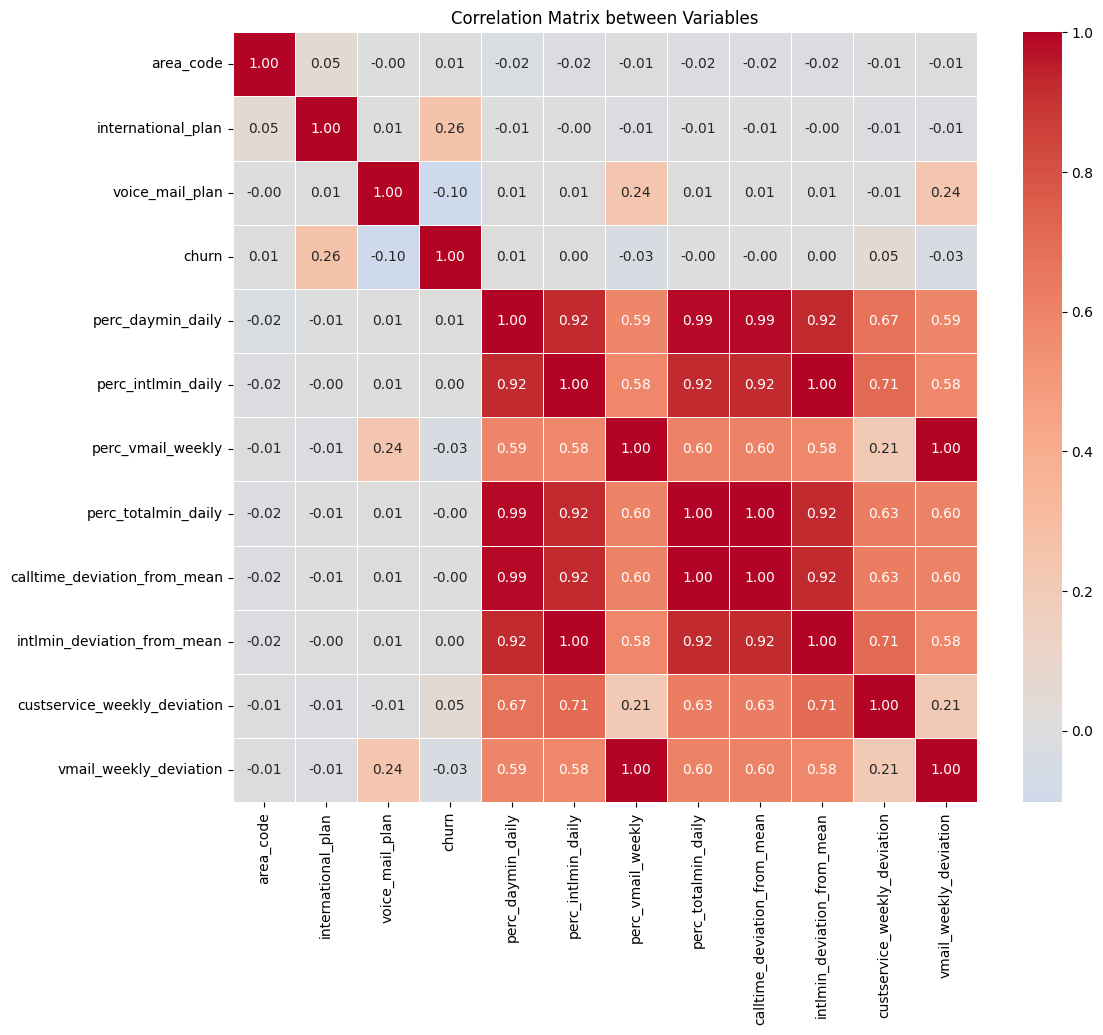

In [1099]:
# Plotting correlation matrix with normalized data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = norm_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

## Multicollinearity - Correlation Analysis, VIF and Lasso

We want to try logistic regression again, with our new normalized features. However, there's a huge risk of multicollinearity, with the strength of correlation between our predictor variables.

We can use VIF (Variance Inflation Factor) to measure how much the variance of regression coefficients are inflated because of collinearity with other predictor variables.

Lasso Regression will then penalize the absolute size of regression coefficients, which help shrink less important predictors towards zero.

Remember that our variables might **simply have a non-linear relationship**, in which case a model like Decision Tree or Random Forest will be more useful than logistic regression. However, we'll toy with our feature selection and correlation coefficients a little more before concluding whether logistic regression is a useful (or not) model.

In [1100]:
# Selecting features to run logistic regression based on correlation matrix
logreg_selects = norm_selects
logreg_selects.drop(columns=['perc_intlmin_daily', 'perc_totalmin_daily', 'calltime_deviation_from_mean', 'intlmin_deviation_from_mean'], axis=1, inplace=True)

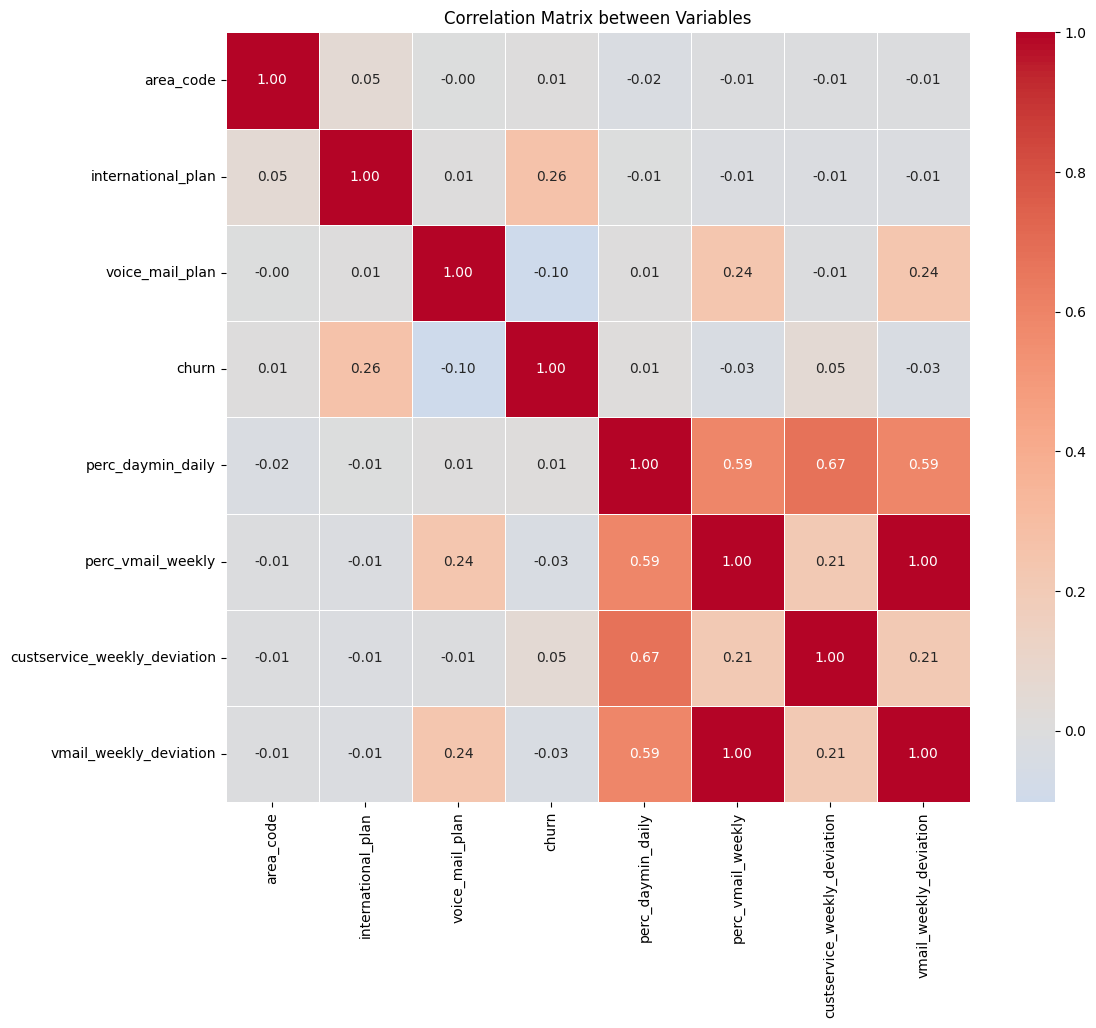

In [1101]:
# Plotting correlation matrix with normalized data
logreg_selects = logreg_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

In [1102]:
# Splitting into X (features) and y (target variable)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Calculate VIF for each feature in X
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_df = calculate_vif(X)
print("Variance Inflation Factors:")
print(vif_df)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso Regression
lasso = Lasso(alpha=0.01)  # Lowered alpha because of initial lack of features
lasso.fit(X_train_scaled, y_train)

# Evaluate Lasso Model
y_pred = lasso.predict(X_test_scaled)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Assuming threshold of 0.5
print("Classification Report:")
# Zero division parameter to account for warning
print(classification_report(y_test, y_pred_class, zero_division=1))

# Selected Features by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:")
print(selected_features)

Variance Inflation Factors:
                        Feature          VIF
0                     area_code     1.002898
1            international_plan     1.003109
2               voice_mail_plan     1.100594
3             perc_daymin_daily     3.060076
4             perc_vmail_weekly  4983.420528
5  custservice_weekly_deviation     2.034106
6        vmail_weekly_deviation  4865.683107
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

Selected Features by Lasso:
Index(['international_plan', 'voice_mail_plan',
       'custservice_weekly_deviation'],
      dtype='object')


We need to drop either perc_vmail_weekly or vmail_weekly_deviation. Let's choose to keep vmail_weekly_deviation.

In [1103]:
logreg_selects.drop('perc_vmail_weekly', axis=1, inplace=True)

## Running Logistic Regression - Selected Features

Let's run logistic regression again, now with our feature selects. 

#### One Hot Encode area code

We'll want to one hot encode our three categorical area_code values.

In [1104]:
# One Hot Encode area code 

categorical_cols = ['area_code']

# Perform one-hot encoding
logreg_selects_encoded = pd.get_dummies(logreg_selects, columns=categorical_cols, drop_first=True)

logreg_selects_encoded.head()

,international_plan,voice_mail_plan,churn,perc_daymin_daily,custservice_weekly_deviation,vmail_weekly_deviation,area_code_415,area_code_510
0,0,1,0,2.071094,-0.117001,0.431033,True,False
1,0,1,0,1.510280,-0.106268,0.764780,True,False
2,0,0,0,1.776642,-0.171688,-0.936155,True,False
3,1,0,0,3.564286,-0.005022,-0.936155,False,False
4,1,0,0,2.222667,0.108312,-0.936155,True,False


In [1105]:
# Convert to integers
logreg_selects_encoded['area_code_415'] = logreg_selects_encoded['area_code_415'].astype(int)
logreg_selects_encoded['area_code_510'] = logreg_selects_encoded['area_code_510'].astype(int)

logreg_selects_encoded.head()

,international_plan,voice_mail_plan,churn,perc_daymin_daily,custservice_weekly_deviation,vmail_weekly_deviation,area_code_415,area_code_510
0,0,1,0,2.071094,-0.117001,0.431033,1,0
1,0,1,0,1.510280,-0.106268,0.764780,1,0
2,0,0,0,1.776642,-0.171688,-0.936155,1,0
3,1,0,0,3.564286,-0.005022,-0.936155,0,0
4,1,0,0,2.222667,0.108312,-0.936155,1,0


In [1106]:
# Logistic Regression

X = logreg_selects_encoded.drop('churn', axis=1)
y = logreg_selects_encoded['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [1107]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [1108]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Accuracy: 0.6719298245614035
Confusion Matrix:
[[463 122]
 [252 303]]


In [1109]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

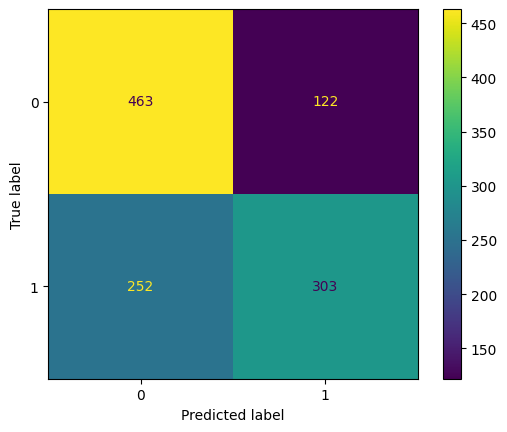

In [1110]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [1111]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       585
           1       0.71      0.55      0.62       555

    accuracy                           0.67      1140
   macro avg       0.68      0.67      0.67      1140
weighted avg       0.68      0.67      0.67      1140



## ROC-AUC

In [1112]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.708970508970509)

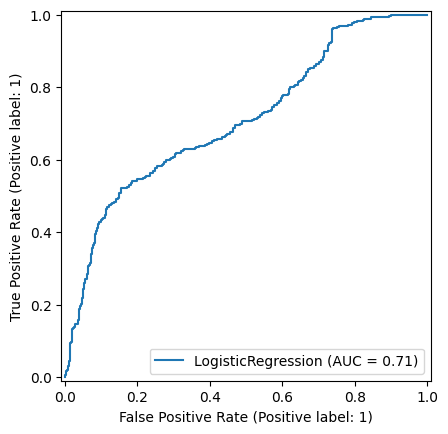

In [1113]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

# Worse Model

The logistic regression is a considerably worse model with our new normalized features. However, these features are much more helpful with regards to developing concrete customer behaviors and patterns that can predict churn without the need for hindsight bias.

Let's see how are other models, Decision Tree and Random Forest, do with these same normalized features.

# Decision Tree - Normalized Features

In [1114]:
# Separate features (X) and target (y)
X = logreg_selects_encoded.drop('churn', axis=1)
y = logreg_selects_encoded['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate model
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       566
           1       0.43      0.38      0.40       101

    accuracy                           0.83       667
   macro avg       0.66      0.64      0.65       667
weighted avg       0.82      0.83      0.82       667

Confusion Matrix:
[[515  51]
 [ 63  38]]


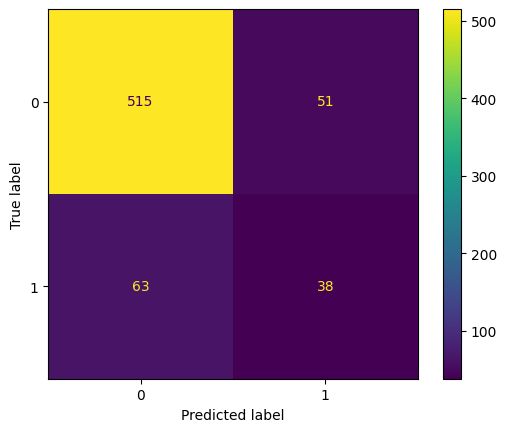

In [1115]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot()

In [1116]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.6430658083476192)

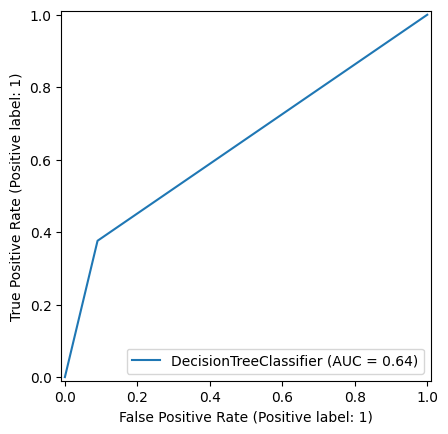

In [1117]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test);

# Random Forest - Normalized Features

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       566
           1       0.45      0.22      0.29       101

    accuracy                           0.84       667
   macro avg       0.66      0.59      0.60       667
weighted avg       0.81      0.84      0.82       667

Confusion Matrix:
[[539  27]
 [ 79  22]]


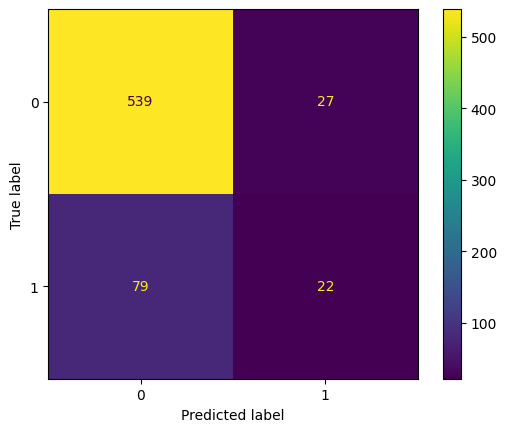

In [1118]:
# Assuming you have split your data and trained the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = rf_classifier.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluate model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()

In [1119]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = rf_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.7481632438862261)

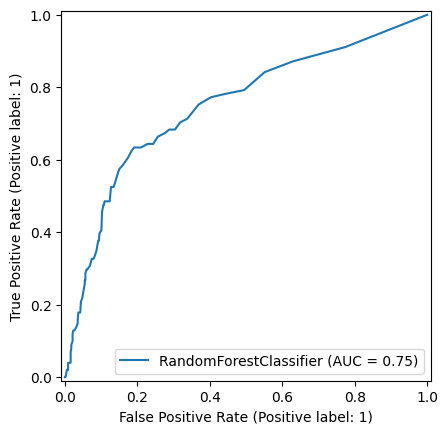

In [1120]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test);

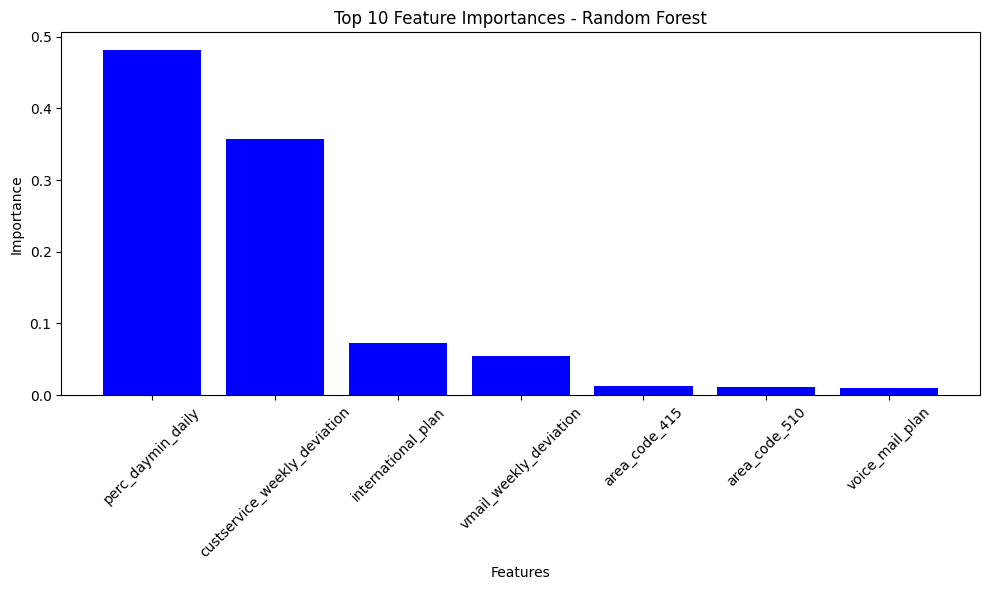

In [1121]:
# Looking at feature importance

importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index[:10], feature_importances['Importance'].head(10), color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Poor Models - Need Further Tuning

Unfortunately, the models with our normalized features are doing a *way worse* job predicting whether a customer will churn, when comparing their results to our original regression model. 

Let's see what other feature tuning we can possibly explore. Else, we can visit our original non-normalized features, determine which ones have high predictability in relation to churn, then interpret them in "normalized contexts".

### Account Length 

We can try examining whether there are huge differences in the account_length values of churn and no-churn customers...then rather than building a metric of "day calls per day" or "customer service calls per week", we can create a threshold such as "If a customer makes a certain number of customer service calls by day **56** of their contract, they are more likely to churn.

Let's run the numbers below...

In [1122]:
max_account_length_all = df['account_length'].max()
print(f"Max account_length in all rows: {max_account_length_all}")

max_account_length_churned = df.loc[df['churn'] == 1, 'account_length'].max()
print(f"Max account_length where churn is 1: {max_account_length_churned}")

Max account_length in all rows: 243
Max account_length where churn is 1: 225


In [1123]:
mean_account_length_all = df['account_length'].mean()
print(f"Mean account_length in all rows: {mean_account_length_all}")

mean_account_length_nochurn = df.loc[df['churn'] == 0, 'account_length'].mean()
print(f"Mean account_length where churn is 0: {mean_account_length_nochurn}")

mean_account_length_churned = df.loc[df['churn'] == 1, 'account_length'].mean()
print(f"Mean account_length where churn is 1: {mean_account_length_churned}")

Mean account_length in all rows: 101.06480648064806
Mean account_length where churn is 0: 100.79368421052632
Mean account_length where churn is 1: 102.66459627329192


Unfortunately, there seems to be nothing useful for us here. 

## State - Chi-Squared

Let's examine the geographic information provided by the 'states' column in our original dataframe. We can use a **Chi-Square Test of Independence** to determine whether the state in which a customer resides is a valid predictor of churn. If this turns out to be the case, we can find a way to adjust our models with this geographic location in mind.

In [1124]:
# df contains 'state' (categorical) and 'churn' (binary) columns
contingency_table = pd.crosstab(df['state'], df['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 83.04379191019663
P-value: 0.002296221552011172


The high chi-square value, along with the low p-value (much lower than our alpha of 0.05), concludes there is a **significant relationship between state and churn**. 

Let's *plot the average churn per state* to get a better understanding of which states will be most influential in our model.

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64


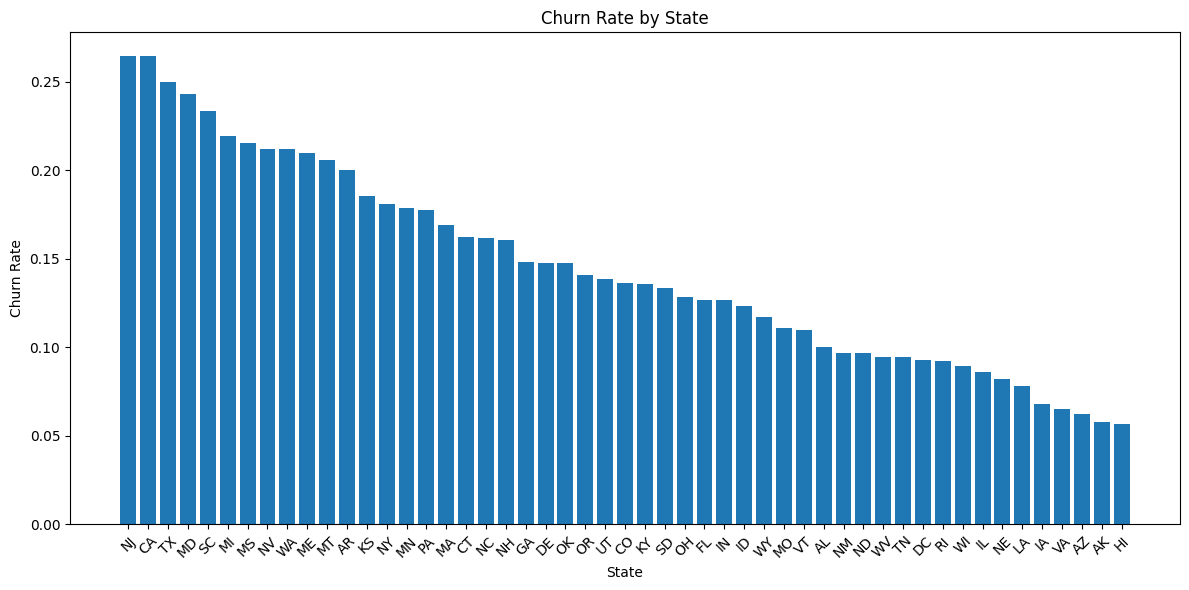

In [1125]:
churn_rate_per_state = df.groupby('state')['churn'].mean().sort_values(ascending=False)
print(churn_rate_per_state)

# Plot churn rates
plt.figure(figsize=(12, 6))
plt.bar(churn_rate_per_state.index, churn_rate_per_state.values)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')
plt.tight_layout()
plt.show()

### Binary Classification for States - High or Low Churn-Rate

One-hot-enconding all of the 51 states represented in our dataset might slow down, and add greater risk of multi-collinearity to our already complex model.


Instead, let's try developing a binary classification system, where we identify whether someone is calling from a state with a **high VS. low churn-rate**. 

We need to determine our threshold for high churn-rate vs. low churn-rate. Let's look at the average churn for our entire dataset, as well as the quantile breakdowns per state.

In [1126]:
# Calculate average churn rate
average_churn_rate = df['churn'].mean()

print(f"Average churn rate: {average_churn_rate}")

Average churn rate: 0.14491449144914492


In [1127]:
# Example: Determine quantiles for thresholding
quantiles = churn_rate_per_state.quantile([0.25, 0.5, 0.75])
print("Quantiles for churn rates:")
print(quantiles)

Quantiles for churn rates:
0.25    0.095557
0.50    0.136364
0.75    0.183219
Name: churn, dtype: float64


We'll actually have *three* classifications for churn rate by state: low (below the 25th percentile), medium (between the 25th percentile and the median), and high (above the median). 

We'll apply this to all of our dataframes we've had at play, for continuity.

Our encoded area_code information does not seem so helpful in hindsight. We'll drop the dataframe logreg_selects_encoded.

In [1128]:
# Calculate churn rate percentiles
quantiles = df.groupby('state')['churn'].mean().quantile([0.25, 0.5, 0.75])

# Define thresholds based on quantiles
low_cr_threshold = quantiles[0.25]
med_cr_threshold = quantiles[0.5]
high_cr_threshold = quantiles[0.75]

# Function to categorize churn rate
def categorize_churn_rate(churn_rate):
    if churn_rate < low_cr_threshold:
        return 'low_cr_state'
    elif churn_rate < med_cr_threshold:
        return 'med_cr_state'
    else:
        return 'high_cr_state'

# Calculate mean churn rate for each state
state_churn_means = df.groupby('state')['churn'].mean()

# Apply categorization function to each state's churn rate
df['churn_category'] = df['state'].map(state_churn_means.apply(categorize_churn_rate))

# Create dummy variables for churn categories
churn_dummies = pd.get_dummies(df['churn_category']).astype(int)

# Concatenate dummies with original dataframe
df = pd.concat([df, churn_dummies], axis=1)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,churn,total_charge,churn_category,high_cr_state,low_cr_state,med_cr_state
0,KS,128,415,0,1,25,265.1,197.4,244.7,10.0,1,0,72.86,high_cr_state,1,0,0
1,OH,107,415,0,1,26,161.6,195.5,254.4,13.7,1,0,55.54,med_cr_state,0,0,1
2,NJ,137,415,0,0,0,243.4,121.2,162.6,12.2,0,0,59.00,high_cr_state,1,0,0
3,OH,84,408,1,0,0,299.4,61.9,196.9,6.6,2,0,65.02,med_cr_state,0,0,1
4,OK,75,415,1,0,0,166.7,148.3,186.9,10.1,3,0,49.36,high_cr_state,1,0,0


In [1129]:
# Drop med_cr_state to avoid multicollinearity
df.drop('med_cr_state', axis=1, inplace=True)

In [1130]:
# Merge df with norm_df on their shared index
norm_df = norm_df.merge(df[['high_cr_state', 'low_cr_state']], how='left', left_index=True, right_index=True)

# Merge df with logreg_selects on their shared index
logreg_selects = logreg_selects.merge(df[['high_cr_state', 'low_cr_state']], how='left', left_index=True, right_index=True)

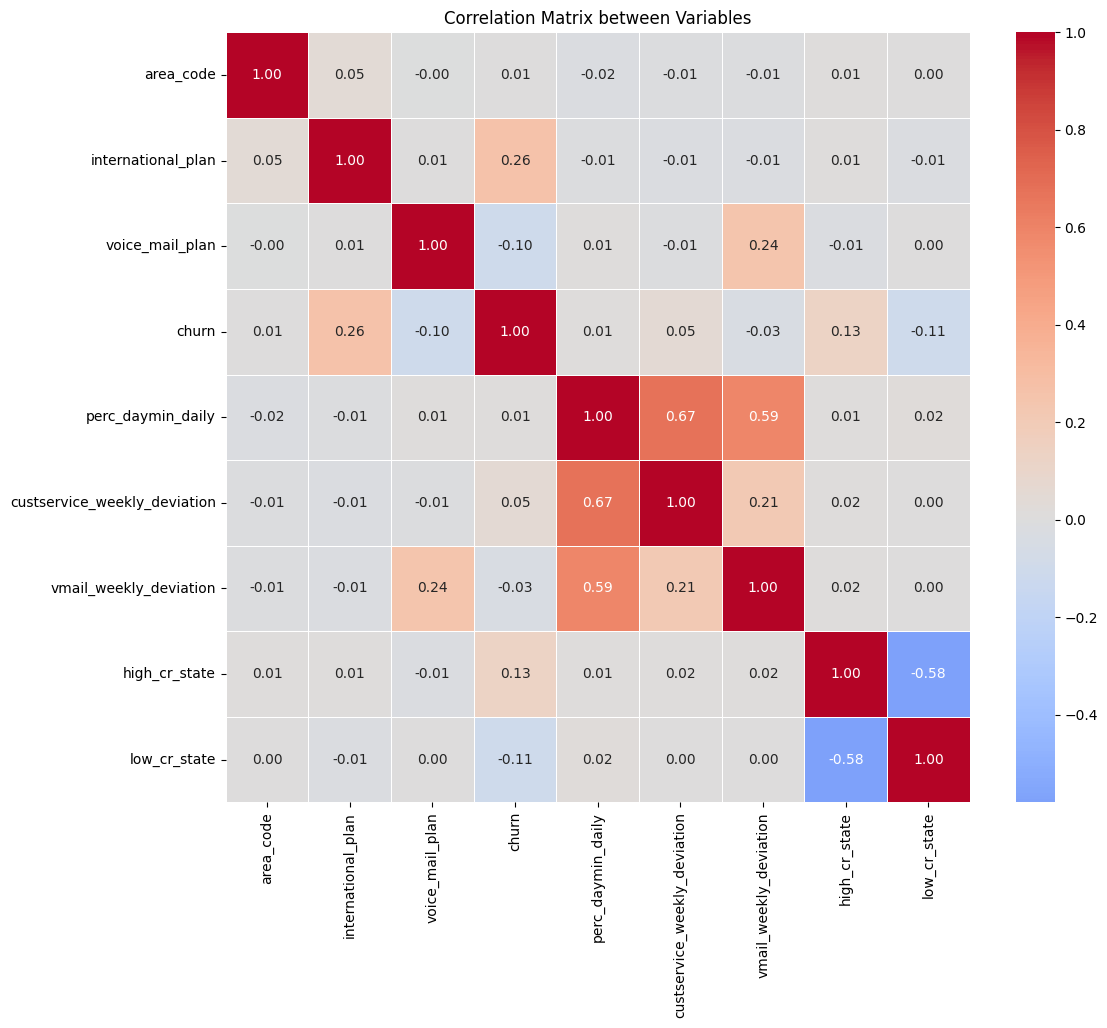

In [1131]:
# Run new correlation matrix
logreg_selects = logreg_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

# Plotting Same Regression Models with States Information

## Logistic Regression

In [1169]:
# Logistic Regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [1170]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [1171]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.01}
Accuracy: 0.6421052631578947
Confusion Matrix:
[[348 237]
 [171 384]]


In [1172]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.01, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

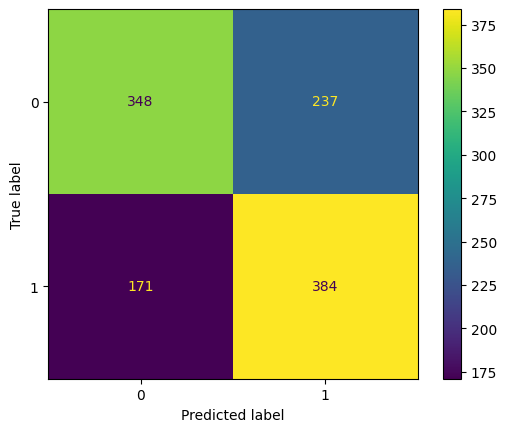

In [1173]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [1174]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       585
           1       0.62      0.69      0.65       555

    accuracy                           0.64      1140
   macro avg       0.64      0.64      0.64      1140
weighted avg       0.65      0.64      0.64      1140

Confusion Matrix:
[[348 237]
 [171 384]]


## ROC-AUC

In [1158]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.7260460460460461)

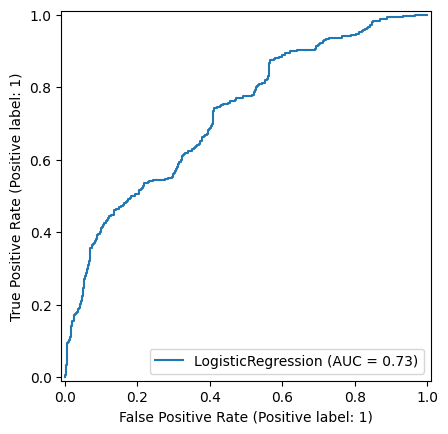

In [1159]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

## Decision Tree

In [1160]:
# Separate features (X) and target (y)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate model
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       566
           1       0.41      0.40      0.40       101

    accuracy                           0.82       667
   macro avg       0.65      0.65      0.65       667
weighted avg       0.82      0.82      0.82       667

Confusion Matrix:
[[509  57]
 [ 61  40]]


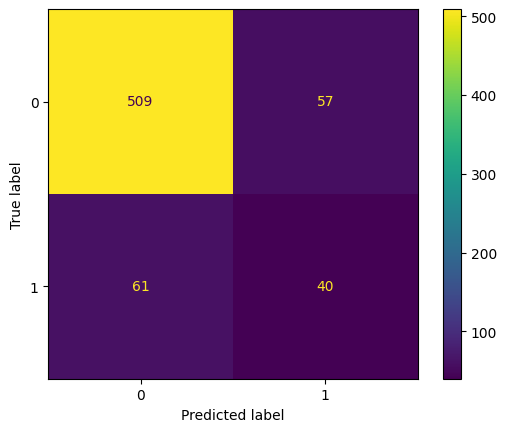

In [1161]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot()

In [1162]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.6476664450897386)

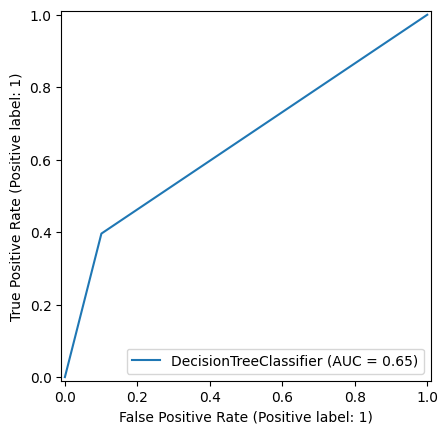

In [1163]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test);

## Random Forest

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       566
           1       0.52      0.27      0.35       101

    accuracy                           0.85       667
   macro avg       0.70      0.61      0.63       667
weighted avg       0.83      0.85      0.83       667

Confusion Matrix:
[[541  25]
 [ 74  27]]


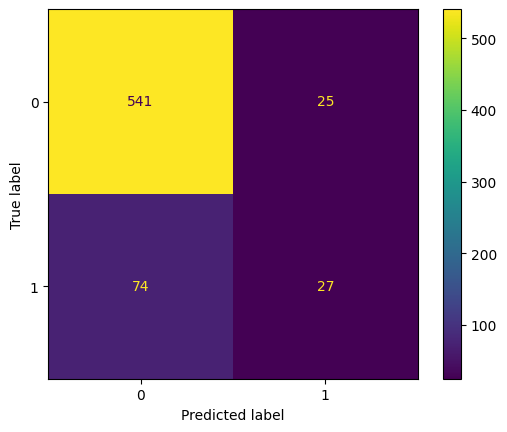

In [1164]:
# Separate features (X) and target (y)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Assuming you have split your data and trained the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = rf_classifier.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluate model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()

In [1165]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = rf_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.7595423853339398)

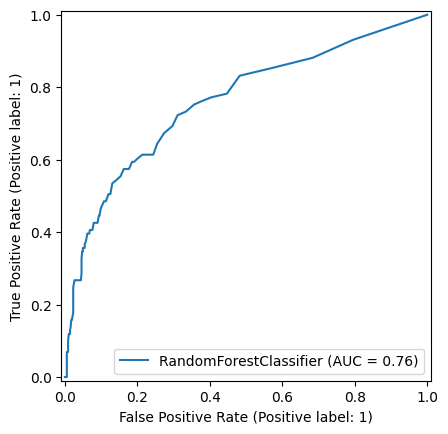

In [1166]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test);

Let's look at feature importance using random forest again.

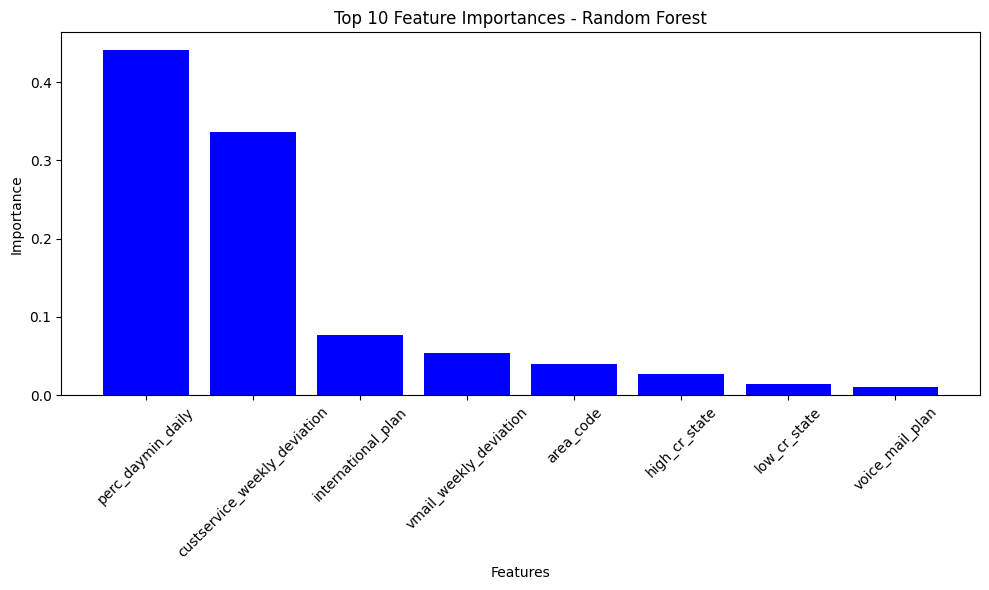

In [1147]:
# Looking at feature importance

importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index[:10], feature_importances['Importance'].head(10), color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's use cross-validation and regularization to try and see how we can combat overfitting. 

We'll first apply this to our logistic regression model (log_reg) that we just ran.

### Using Ridge, and Cross-Validation

We'll use Ridge (l2), since we are now trying to account for collinearity, rather than further feature selection (which would make lasso for useful).

In [1148]:
# Logistic Regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create logistic regression model with regularization
logreg = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')

In [1149]:
# Fit the model on the entire dataset
logreg.fit(X_train, y_train)

# Optionally, perform cross-validation to evaluate the model
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv parameter as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.62719298 0.6370614  0.65570175 0.67653509 0.66337719]
Mean CV accuracy: 0.6519736842105264


Let's see what correlation med_cr_state (states with a churn-rate between the 25th and 50th percentiles), havce to churn compared with high and low churn-rate states.

In [1150]:
# Add med_cr_state column based on conditions
logreg_selects['med_cr_state'] = 0  # Initialize with 0
logreg_selects.loc[(logreg_selects['high_cr_state'] == 0) & (logreg_selects['low_cr_state'] == 0), 'med_cr_state'] = 1

# Test correlation with churn
correlation = logreg_selects[['med_cr_state', 'churn']].corr().iloc[0, 1]

print("Correlation between med_cr_state and churn:", correlation)

Correlation between med_cr_state and churn: -0.04544745978330434


In [1151]:
logreg_selects['med_cr_state'].value_counts()

med_cr_state
0    2512
1     821
Name: count, dtype: int64

In [1167]:
# Not a strong enough correlation compared to high and low states. Drop again to avoid multicollinearity.
logreg_selects.drop('med_cr_state', axis=1, inplace=True)

# Best Model: Logistic Regression

Among our models, logistic regression is the best at predicting class-1 (churn) outcomes, with these scores:

Precision: 0.62

Recall: 0.69

F-1 score: 0.65

ROC-AUC: 0.726

Our Random Forest model had a higher ROC-AUC score, yet considerably lower scores such as precision and recall when it came to accurately predicting churn. 

Our logistic regressin model still has room for improvement. Let's try one more method of tuning. If we look back at our very first logistic regression model (before we normalized all of the features), 'customer_service_calls' and 'total_day_minutes' both had higher correlations with our target variable 'churn' -- correlations of 0.21.

Since correlation is a hugely helpful metric when running logistic regression, let's try switching one these out for the normalized version of that same feature and see if it helps. We'll do customer_service_calls...it might be helpful to have the 'non-normalized' version...we can interpret this to stakeholders as "once a customer reaches *x* number of customer service calls, they are more likely to churn." Rather than determining the calls per week percentage.

In [1176]:
logreg_selects = logreg_selects.merge(df[['customer_service_calls']], left_index=True, right_index=True)

In [1178]:
# drop other customer service metric to avoid multicollinearity
logreg_selects.drop('custservice_weekly_deviation', axis=1, inplace=True)

In [1180]:
# Run regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [1181]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [1182]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.1}
Accuracy: 0.7210526315789474
Confusion Matrix:
[[445 140]
 [178 377]]


In [1183]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

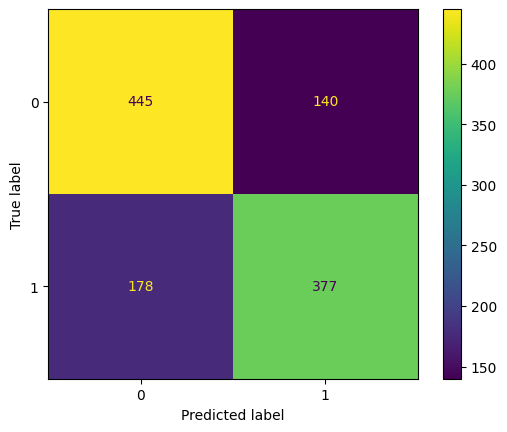

In [1184]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [1185]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       585
           1       0.73      0.68      0.70       555

    accuracy                           0.72      1140
   macro avg       0.72      0.72      0.72      1140
weighted avg       0.72      0.72      0.72      1140

Confusion Matrix:
[[445 140]
 [178 377]]


In [1186]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.785021945021945)

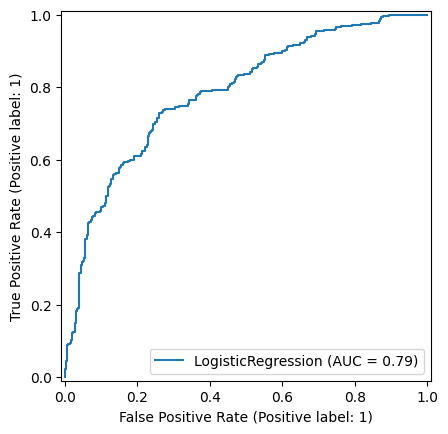

In [1187]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

This is much better! Let's do the same thing with our 'total_day_minutes' column, swapping it for our 'perc_day_daily' feature. We can do the same thing regarding interpreting this 'non-normalized' value -- by saying something such as, "Once a customer has logged this many daytime minutes, they are more likely to churn."

In [1188]:
df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
       'customer_service_calls', 'churn', 'total_charge', 'churn_category',
       'high_cr_state', 'low_cr_state'],
      dtype='object')

In [1189]:
logreg_selects.keys()

Index(['area_code', 'international_plan', 'voice_mail_plan', 'churn',
       'perc_daymin_daily', 'vmail_weekly_deviation', 'high_cr_state',
       'low_cr_state', 'customer_service_calls'],
      dtype='object')

In [1190]:
logreg_selects = logreg_selects.merge(df[['total_day_minutes']], left_index=True, right_index=True)

In [1192]:
logreg_selects.drop('perc_daymin_daily', axis=1, inplace=True)

In [1193]:
# Run regression again

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [1194]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [1195]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.1}
Accuracy: 0.775438596491228
Confusion Matrix:
[[443 142]
 [114 441]]


In [1196]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

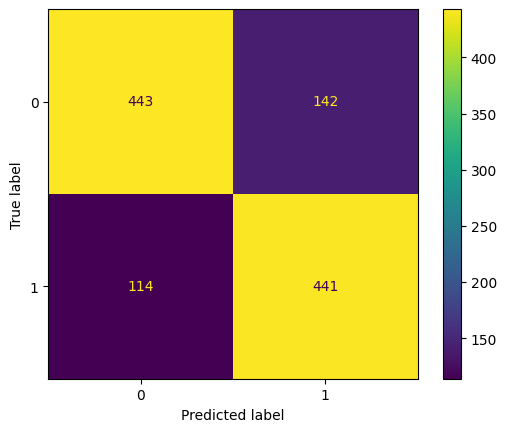

In [1197]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [1198]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       585
           1       0.76      0.79      0.78       555

    accuracy                           0.78      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.78      0.78      0.78      1140

Confusion Matrix:
[[443 142]
 [114 441]]


In [1199]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

np.float64(0.8409363209363209)

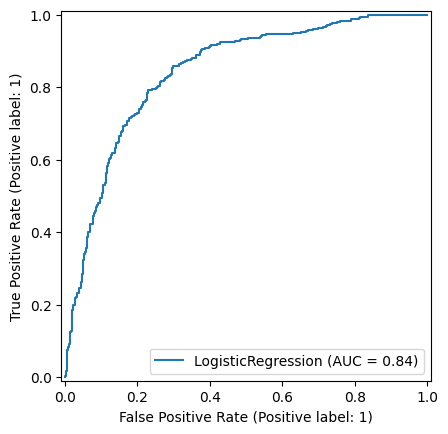

In [1200]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

## Great model!

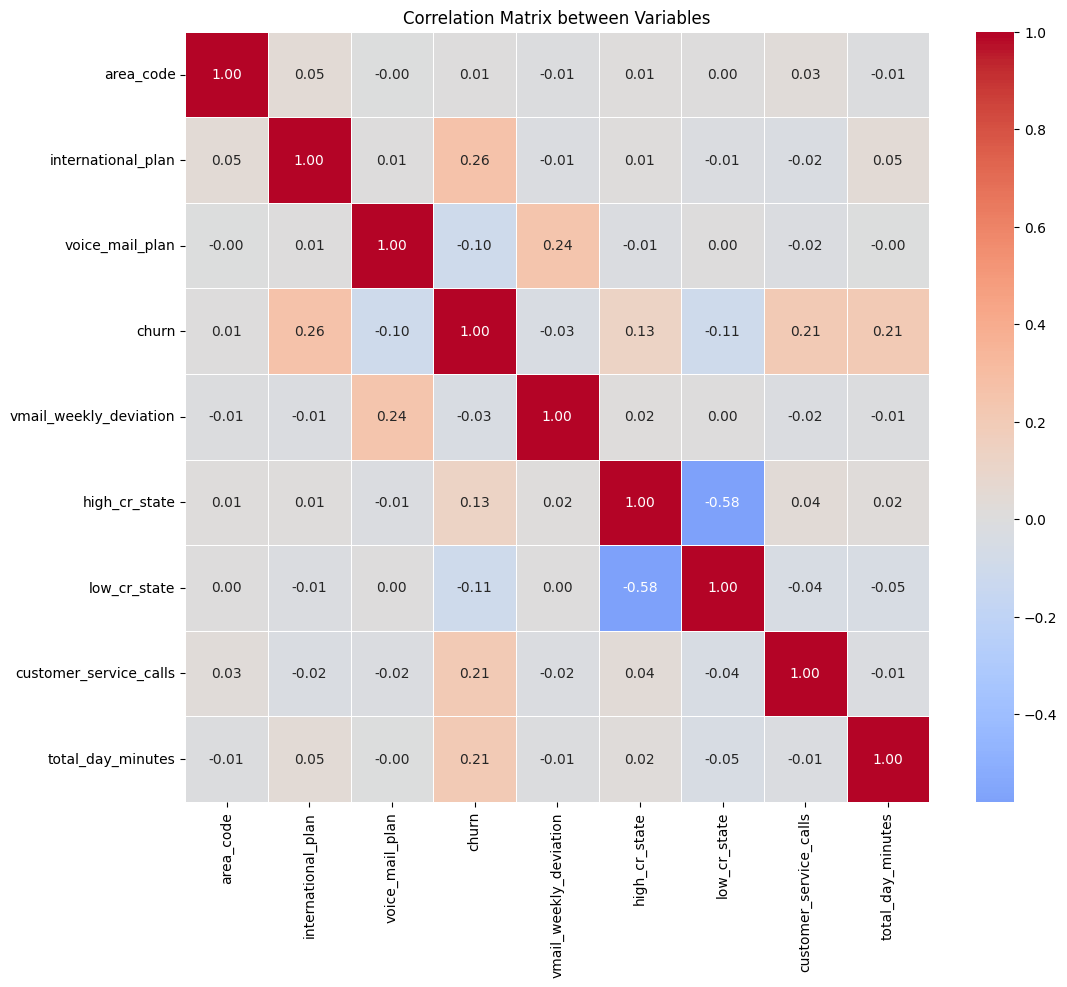

In [1201]:
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

In [1]:
Adding Commits: Loading ipynb file from Dolgor

SyntaxError: invalid syntax (3826588094.py, line 1)